In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy
from scipy.stats import linregress
import matplotlib
import bluepysnap as bp
from scipy import signal

In [2]:
%matplotlib widget

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
# Defines paths to the two simulation campaigns
s = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd'
s1 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/original/fixed/a9f782a3-1f22-4384-a122-430bc6b2323c'
s2 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/97d6aa07-db02-48c6-91c2-b3023ce5bdd0'
s3 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/ecb3ceed-f1bf-4ff0-8067-9bcfd0d2bf4f'
# s4 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/reduceInhibition/L23_BTC/da48f665-8b07-4aaf-a8f2-7a4c52f9df71'
# s5 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/reduceInhibition/L5_BTC/ebc8e94d-37ea-4bad-af06-32defff79dbb'
s6 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/af883cc4-40c0-4a0e-a179-a329c87fb346'
# s7 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/silent/69470182-2140-4078-9a09-6d7fe0d798e0'

s8 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL4Inh/871c007b-face-4656-b883-eed949ffbc92'

s9 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL5Inh/c2ba9f02-6a83-426f-a77f-fa766cd97e1b'

s10 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL6Inh/8bc7ca1f-45c8-47a2-a656-17e86bc2b384'

s11 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL23Inh/da78079e-3792-4ebd-a57b-f72ccd3fde11'
s12 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL23Exc/5bed2b84-e59a-4925-8556-d8c8a4815448'

s13 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL4Exc/d2632df2-f8f4-469d-bbe5-25c794668551'
s14 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5Exc/18ecf6a9-eae2-463e-a272-002907a40f07'
s15 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL6Exc/c9476d38-4af9-45a6-b1cf-77f3528f5b56'

s17 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL23Exc/d6d80bd8-f3ec-4f9c-a142-24d475412346'
s18 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL23Inh/7a688cef-aaec-4007-96ad-e9816549ed19'
s19 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL4Exc/6dbad045-83ca-45de-88f7-ec17e17c5dc3'
s20 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL4Inh/22249d06-3572-414c-a0aa-98828e1845ac'
s21 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5Exc/293e98bf-8010-4ab2-9fd0-352989d62a8a'
s22 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5Inh/e21b5a4e-e45b-4346-bd59-62f825b5b791'
s23 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL6Exc/032c2685-dc15-4f0d-a577-839673df0543'
s24 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL6Inh/5494e691-2a56-4228-aeaa-79fe165001e1'

s25 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5MC/79ff580a-035f-4355-bb5c-5f216f7a5dc8'
s26 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5LBC/088f41b4-dbe4-4613-aff2-378ebca9d77c'
s27 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5NBC/7bd2120f-64a1-4c33-8824-83cc7c03a974'

s28 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5MC/7ba59df7-74ad-415c-94b2-e0bebc400500'
s29 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5LBC/2d45c3db-8c1a-4bd9-a425-567d1dd0e22e'
s30 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5NBC/6176915e-1996-4761-9002-86e5ba2a97dc'



In [5]:
s31 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL1Inh/56add26b-6318-445b-b83e-f8461c9314ed'
s30 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL1Inh/9508592e-7855-4acb-9f7e-c3f276ec6500'
s32 = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/testReference/94fc0a48-b6c2-4d0f-a659-4c9aab03dd01/'

In [6]:
sD = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/testReplay/a1a9ac12-0a91-432d-8a9e-00c94f19b024//'
sDR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/testReplay/28c64364-b4c8-442d-af7e-ca82e7f473f8'


In [7]:
sR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/f090d92c-29b1-4033-96d2-e1a67b33dab6/'


In [8]:
sRef = '/gpfs/bbp.cscs.ch/project/proj83/scratch/home/isbister/post_physiology_2023/sim_data/debugging_tests/5_debugging_test_30-11-23/2919081d-a24b-4961-8f53-998f2af9f620/'

In [9]:
sPom = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/testReplay/pom/fba76444-1411-4c49-8b15-8afdf7d304b4'


In [10]:
sC = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/compressedTime/e56c337b-eeed-4a10-b584-03edb277421a'


In [11]:
sT = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/noThalamus/7f42ec58-030d-4a17-8cb0-d2c36616221a'
sTr = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noThalamus/7a9152d8-7fe1-41d3-9fea-703fe7b01f80'

In [12]:
sbcR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5SBC/c7133460-bab3-4c76-8c4d-35b94666f649'
sbc = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL5SBC/aef0e0c6-11f8-4db6-bc66-0d1b6a22cc1c'


In [13]:
ngcR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5NGC/100e075a-adf2-47a6-87b9-f02aa7a9976f'
ngc = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL5NGC/88b6321d-e92d-4a2f-9bb4-d8cfd0b15887'


In [14]:
chcR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5CHC/4f45d4f1-9aad-4bfb-8fd9-2e3c72f3ace7'
chc = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick//disconnected/fixed/noNoise/noL5CHC/5a0b1de3-e2c5-4fa3-8a68-d90ec9569517'


In [15]:
btcR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5BTC/eb0d5176-c318-4136-a37f-a8da59459908'
btc = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5BTC/edd0bc89-981a-42d4-9105-75c6368babd7'


In [16]:
dbcR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise/noL5DBC/8e92b2cd-52b6-45d6-bc9d-65ceb53dfec9'
dbc = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5DBC/8c91e644-68b6-4904-8c3c-e548f771a373'


In [17]:
bpR = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/rewired/disconnected/noNoise//noL5BP/3d8b7361-96fe-4388-b77a-31adaeccb8d1'
bpSim = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/disconnected/fixed/noNoise/noL5BP/ec716462-5b0e-4fc5-bdf5-f1401079e30d'


In [18]:
def getHistByLayer(path_to_sims,bins=None):

    '''
    Thsi function iterates through all of the trials, and produces a spike time histogram for each layer, separately for excitatory and inhibitory cells. 
    Outputs a matrix of size nTrials x 2 x nLayers x nBins
    '''

    numSims = 10
    numLayers = 6
    numBins = 225
    bins = np.linspace(1975,2200,numBins+1)

    allSpikes = np.zeros([numSims,2,numLayers,numBins])
   
    for sim in range(numSims):

        s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )

        c = s.circuit
        layerDF = list(c.nodes.get(group='hex_O1',properties=['layer','synapse_class']))[0][1].loc['S1nonbarrel_neurons']
    
        for layer in np.arange(1,numLayers+1):

            layerIds = list(layerDF[layerDF['layer']==layer].index)


            for classIdx, synClass in enumerate(['EXC','INH']):

                classIds = list(layerDF[layerDF['synapse_class']==synClass].index)

                selectedIds = np.intersect1d(layerIds,classIds)

            
                spikes = s.spikes['S1nonbarrel_neurons'].get(group=selectedIds,t_start=1975,t_stop=2200)

            
                if bins is None:
                    
                    spike_hist,bins = np.histogram(list(spikes.index),bins=numBins)

    
                else:
    
                    spike_hist,_ = np.histogram(list(spikes.index),bins=bins)
            
                allSpikes[sim,classIdx,layer-1] = spike_hist


    return allSpikes, bins

In [24]:
spikes_original, bins = getHistByLayer(sRef)

RuntimeError: Path `/gpfs/bbp.cscs.ch/project/proj83/scratch/home/isbister/post_physiology_2023/sim_data/debugging_tests/5_debugging_test_30-11-23/2919081d-a24b-4961-8f53-998f2af9f620//0/simulation_config.json` is not a file

In [20]:
spikes = getHistByLayer(s,bins)

(30.0, 80.0)

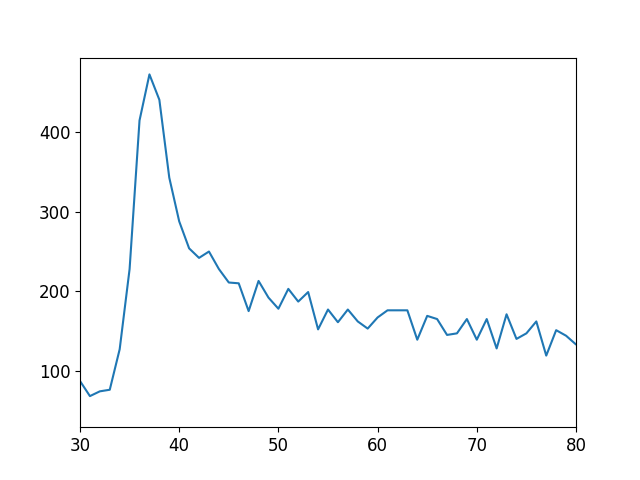

In [28]:
plt.figure()
plt.plot(np.sum(spikes_original,axis=0)[0,5])
plt.xlim([30,80])

In [98]:
spikes[0].shape

(10, 2, 6, 225)

In [20]:
spikes = np.sum(spikes_original,axis=0)

In [21]:
spikes.shape

(2, 6, 225)

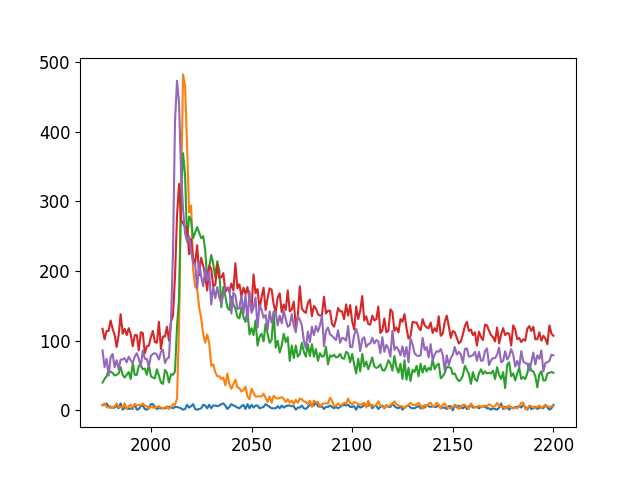

In [15]:
plt.figure()
for i in np.arange(1,6):
    plt.plot(bins[1:],spikes[0,i])

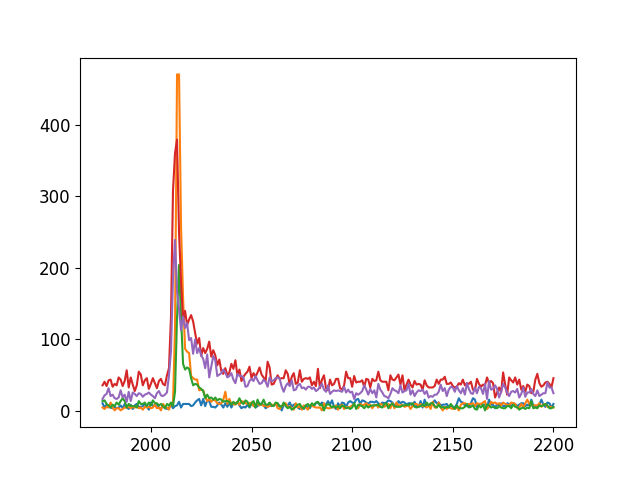

In [16]:
plt.figure()
for i in np.arange(1,6):
    plt.plot(bins[1:],spikes[1,i])

In [17]:
import h5py

    
# spikeFile = h5py.File(sRef+'/0/reporting/spikes.h5')

# if i == 0:
#     refSpikes = spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]
# else:
#     refSpikes = np.hstack((refSpikes,spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]))
    
# spikeFile.close()

i = 0
        
spikeFile = h5py.File(s1+'/0/reporting/spikes.h5')
if i == 0:
    origSpikes = spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]
else:
    origSpikes = np.hstack((origSpikes,spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]))
spikeFile.close()

spikeFile = h5py.File(s+'/0/reporting/spikes.h5')
if i == 0:
    rewiredSpikes = spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]
else:
    rewiredSpikes = np.hstack((rewiredSpikes,spikeFile['spikes']['S1nonbarrel_neurons']['timestamps'][:]))
spikeFile.close()


In [18]:
rewiredSpikes

array([   43.925     ,    45.175     ,    45.175     , ...,
       11999.85000014, 11999.90000014, 11999.90000014])

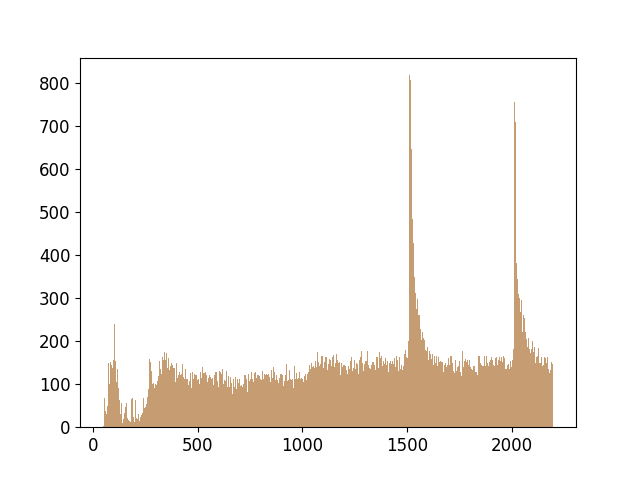

In [19]:
plt.figure()
# plt.hist(refSpikes,bins=500,alpha=0.1)

plt.hist(origSpikes,bins=500,alpha=0.5)

plt.hist(rewiredSpikes[rewiredSpikes<2200],bins=500,alpha=0.5)


plt.show()

In [20]:
bins = (bins[:-1]+bins[1:])/2

In [19]:
time = np.linspace(-25,200,22000-19750)

In [20]:
def meanAndCI(EEGs):

    '''
    Given a matrix of EEG or spike histograms for each trial, finds the mean and 95% CI over trials
    '''

    mean = np.mean(EEGs,axis=0)

    lowerbound = scipy.stats.t.ppf(0.05,9,mean,np.std(EEGs,axis=0))
    upperbound = scipy.stats.t.ppf(0.95,9,mean,np.std(EEGs,axis=0))

    return mean, lowerbound, upperbound

In [21]:
def getEEGsByTypes(path):

    '''
    Given a path ot a simulation, creates a dictionary of EEG signals for each cell type
    '''

    EEGs = {}

    for file in os.listdir(path+'/pkls'):
        t = file.split('.')[0].split('g')[1]

        p = pd.read_pickle(path+'/pkls/'+file).values

        sos =  signal.butter(2,[1,500],btype='bandpass',output='sos',fs=10000)

        p1 = signal.sosfilt(sos,p,axis=0)
        
        EEGs[t] = p1[19750:22000,0] #pd.read_pickle(path+'/pkls/'+file).values[19750:22000,0] # For memory reasons, we extract only a portion of the signal

    return EEGs

In [22]:
def getEEGByLayer(path_to_sims):

    '''
    Iterates over all trials, and produces a matrix of the EEG contributions of each layer, for excitatory and inhibitory cells separately
    Outputs a matrix of size nTrials x 2 x nLayers x nTimeSteps
    '''

    duration = 22000-19750

    allEEGList = []

    numSuccess = 0

    for sim in range(10):

        # try:

        s = bp.Simulation( path_to_sims +'/'+str(sim) + '/simulation_config.json' )
        c = s.circuit
        
    
        eegEXC = np.zeros((7,duration))
        eegINH = np.zeros((7,duration))
    
        eegList = [eegEXC, eegINH]

        EEGsByTypes = getEEGsByTypes(path_to_sims +'/'+str(sim))

        if EEGsByTypes == {}:
            continue
        else:
            numSuccess += 1
    
        for mtype in np.sort(np.unique(list(EEGsByTypes.keys()))):
    
            synsDF = list(c.nodes.get(group=mtype,properties=['synapse_class']))[0][1].loc['S1nonbarrel_neurons'].iloc[0].values
    
            if synsDF=='EXC':
                synIdx = 0
            elif synsDF=='INH':
                synIdx = 1
    
            layer = int(mtype.split('_')[0].split('L')[1])
    
            if layer == 2 or layer == 3 or layer == 23:
                layer = 2
    
            eegList[synIdx][layer] += (EEGsByTypes[mtype])#-np.mean(EEGsByTypes[mtype][:250])) # Removes baseline offset

        allEEGList.append(eegList)        

          # except:
    #         numFailures += 1

    # if numFailures > 0:
    #     print(numFailures)
    
    return np.array(allEEGList)

In [123]:
def getEEGs(path,skip=False):

    '''
    Given a path to simulations, outputs the EEG from each trial
    Outputs a matrix of size nTrials x nTimeSteps
    '''

    if skip == True:
        EEGs = list(np.zeros(9))

        for j, i in enumerate([0,1,2,3,4,6,7,8,9]):
    
            for file in os.listdir(path+'/'+str(i)+'/pkls'):
    
                EEGs[j] += pd.read_pickle(path+'/'+str(i)+'/pkls/'+file).values[19750:22000,0] # For memory reasons, we extract only a portion of the signal

    
    else:
        EEGs = list(np.zeros(10))

        for i in range(10):
    
            for file in os.listdir(path+'/'+str(i)+'/pkls'):
    
                EEGs[i] += pd.read_pickle(path+'/'+str(i)+'/pkls/'+file).values[19750:22000,0] # For memory reasons, we extract only a portion of the signal

    
    EEGs = np.array(EEGs)

    sos =  signal.butter(2,[1,500],btype='bandpass',output='sos',fs=10000)

    EEGs -= np.mean(EEGs[:,:250],axis=-1)[:,np.newaxis] # Removes baseline offset
    p1 = signal.sosfilt(sos,EEGs,axis=1)
    

    return p1

In [119]:
e.shape

(10, 2250)

In [24]:
def getStuff(path):

    EEGs = getEEGs(path)
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound

In [25]:
def getByLayer(path):

    EEGs = np.array(getEEGByLayer(path))
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound 

In [26]:
mean_layer, _, _= getByLayer(s)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [27]:
mean_layer_original, _, _= getByLayer(s1)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [28]:
mean_layer_compressed, _, _= getByLayer(sC)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [29]:
mean_layer_disconnected, _, _ = getByLayer(s3)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [30]:
mean_layer_disconnected_noThal, _, _ = getByLayer(sT)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [31]:
mean_layer_disconnected_noThalR, _, _ = getByLayer(sTr)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [32]:
#mean_layer, lowerbound_layer, upperbound_layer = getByLayer(s)

mean_layer_rewired, _, _= getByLayer(s2)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [33]:
mean_layer_rewired_reference, _, _= getByLayer(s32)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [34]:

# mean_layer_rewiredDS, lowerbound_layer_rewiredDS, upperbound_layer_rewiredDS = getByLayer(s7)

mean_layer_L4, _, _ = getByLayer(s8)
mean_layer_L5, _, _ = getByLayer(s9)
mean_layer_L6, _, _ = getByLayer(s10)

mean_layer_L23Inh, _, _ = getByLayer(s11)
mean_layer_L23Exc, _, _ = getByLayer(s12)

mean_layer_L4Exc, _, _ = getByLayer(s13)
mean_layer_L5Exc, _, _ = getByLayer(s14)
mean_layer_L6Exc, _, _ = getByLayer(s15)



/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered 

In [35]:
mean_layer_L23ExcD, _,_ = getByLayer(s17)
mean_layer_L23InhD, _,_ = getByLayer(s18)
mean_layer_L4ExcD, _,_ = getByLayer(s19)
mean_layer_L4InhD, _,_ = getByLayer(s20)
mean_layer_L5ExcD, _,_ = getByLayer(s21)
mean_layer_L5InhD, _,_ = getByLayer(s22)
mean_layer_L6ExcD, _,_ = getByLayer(s23)
mean_layer_L6InhD, _,_ = getByLayer(s24)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered 

In [36]:
rewired_MC, _,_ = getByLayer(s25)



D_MC, _,_ = getByLayer(s28)
D_LBC, _,_ = getByLayer(s29)
D_NBC, _,_ = getByLayer(s30)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered 

In [37]:
rewired_NBC, _,_ = getByLayer(s27)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [38]:
rewired_LBC, _,_ = getByLayer(s26)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [39]:
mean_layer_L1Inh, _,_ = getByLayer(s30)
mean_layer_L1InhD, _,_ = getByLayer(s31)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [40]:
rewired_SBC, _,_ = getByLayer(sbcR)

D_SBC, _,_ = getByLayer(sbc)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [41]:
rewired_NGC, _,_ = getByLayer(ngcR)

D_NGC, _,_ = getByLayer(ngc)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [42]:
rewired_CHC, _,_ = getByLayer(chcR)

D_CHC, _,_ = getByLayer(chc)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [43]:
rewired_BTC, _,_ = getByLayer(btcR)

D_BTC, _,_ = getByLayer(btc)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [44]:
rewired_BP, _,_ = getByLayer(bpR)
# rewired_DBC, _,_ = getByLayer(dbcR)


/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [45]:

D_BP, _,_ = getByLayer(bpSim)


D_DBC, _,_ = getByLayer(dbc)

/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/gpfs/bbp.cscs.ch/home/tharayil/bluerecording-dev/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [46]:
mean_layer_disconnected

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.15127438e-10,  5.12076064e-10,  5.16364469e-10, ...,
          3.23525168e-11,  3.91409196e-11,  4.20951848e-11],
        ...,
        [-2.50385506e-10, -2.50192026e-10, -2.42186189e-10, ...,
         -4.39041707e-11, -3.46172598e-11, -1.56695872e-11],
        [ 7.82220855e-10,  8.39579198e-10,  8.83608947e-10, ...,
         -1.04891246e-09, -9.51586770e-10, -9.07082826e-10],
        [-7.50505747e-10, -8.48132606e-10, -9.27784355e-10, ...,
          5.34255861e-09,  5.33405024e-09,  5.31643158e-09]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.25767980e-10, -1.02240565e-10, -8.40467912e-11, ...,
         -1.99708794e-10, -2.06881581e

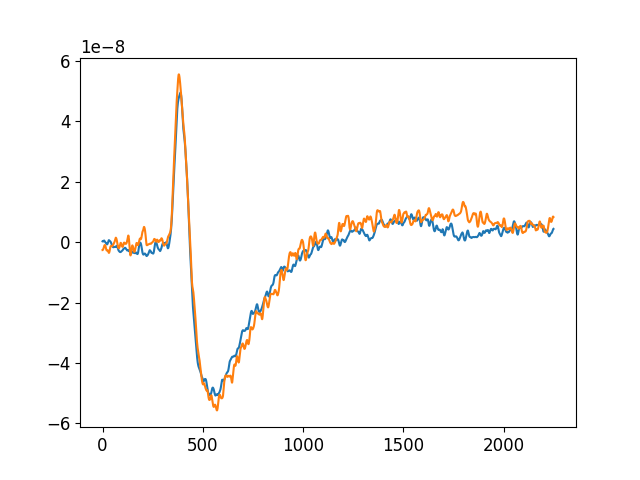

In [112]:
plt.figure()
plt.plot(np.sum(mean_layer_disconnected[0],axis=0))
plt.plot(np.sum(mean_layer_original[0],axis=0)-np.sum(mean_layer_disconnected_noThal[0],axis=0))

In [47]:
def FWHM(signal, time = None):

    if time is None:
        time = np.linspace(-25,200,22000-19750)
    else:
        from scipy.interpolate import interp1d
        fcn = interp1d(time,signal,bounds_error=False,fill_value=0)
        time = np.linspace(-25,200,22000-19750)
        signal = fcn(time)

    smoothed = signal # np.convolve(np.ones(100),signal,mode='same')

    minpoint = np.argmin(smoothed)

    minimum = np.min(smoothed)
    peak = np.argmax(smoothed)

    if peak > minpoint:
        peak = 0

    firstPoint = np.argmin(np.abs(smoothed[peak:minpoint]-minimum/2))+peak

    secondPoint = np.argmin(np.abs(smoothed[minpoint:]-minimum/2))+minpoint

    return time[secondPoint] - time[firstPoint]

In [48]:
inVivo = np.genfromtxt('../../invivo_P16_20241111.csv',delimiter=',')
inVivo[:,1]-=inVivo[0,1]
inVivo[:,1]*=1e-6/5000

In [49]:
inVivo13 = np.genfromtxt('../../invivo_P13_20241111.csv',delimiter=',')
inVivo13[:,1]-=inVivo13[0,1]
inVivo13[:,1]*=1e-6/5000

In [50]:
inVivo21 = np.genfromtxt('../../invivo_P21_20241111.csv',delimiter=',')
inVivo21[:,1]-=inVivo21[0,1]
inVivo21[:,1]*=1e-6/5000

In [51]:
inVivo10 = np.genfromtxt('../../invivo_P10_20241111.csv',delimiter=',')
inVivo10[:,1]-=inVivo10[0,1]
inVivo10[:,1]*=1e-6/5000

In [66]:
inVivoY = inVivo[:,1]/np.max((inVivo[:,1]))*np.max((np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0)))
inVivo13Y = inVivo13[:,1]/np.max((inVivo13[:,1]))*np.max((np.sum(mean_layer_original[0],axis=0)))
inVivo21Y = inVivo21[:,1]/np.max((inVivo21[:,1]))*np.max((np.sum(mean_layer_original[0],axis=0)))

# inVivoYR = inVivo[:,1]/np.max(np.abs(inVivo[:,1]))*np.max(np.abs(np.sum(mean_layer_rewired[0],axis=0)/9))
# inVivo13YR = inVivo13[:,1]/np.max(np.abs(inVivo13[:,1]))*np.max(np.abs(np.sum(mean_layer_rewired[0],axis=0)/9))
# inVivo21YR = inVivo21[:,1]/np.max(np.abs(inVivo21[:,1]))*np.max(np.abs(np.sum(mean_layer_rewired[0],axis=0)/9))

# inVivoYD = inVivo[:,1]/np.max(np.abs(inVivo[:,1]))*np.max(np.abs(np.sum(mean_layer_disconnected[0],axis=0)/10))
# inVivo13YD = inVivo13[:,1]/np.max(np.abs(inVivo13[:,1]))*np.max(np.abs(np.sum(mean_layer_disconnected[0],axis=0)/10))
# inVivo21YD = inVivo21[:,1]/np.max(np.abs(inVivo21[:,1]))*np.max(np.abs(np.sum(mean_layer_disconnected[0],axis=0)/10))

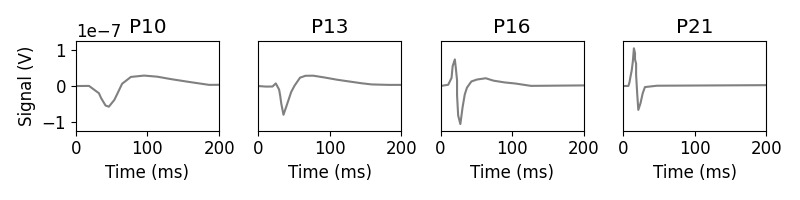

In [384]:
plt.figure(figsize=(8,2))

plt.subplot(1,4,1)
plt.plot(inVivo10[:,0], inVivo10[:,1],color='grey')
plt.xlim([0,200])
plt.ylim([-1.25e-7,1.25e-7])
plt.ylabel('Signal (V)')
plt.xlabel('Time (ms)')
plt.title('P10')

ax1 = plt.subplot(1,4,2)
plt.plot(inVivo13[:,0], inVivo13[:,1],color='grey')
plt.xlim([0,200])
plt.ylim([-1.25e-7,1.25e-7])
ax1.set_yticks([])
plt.xlabel('Time (ms)')
plt.title('P13')

ax2 = plt.subplot(1,4,3,sharey=ax1)
plt.plot(inVivo[:,0], inVivo[:,1],color='grey')
plt.xlim([0,200])
ax2.set_yticks([])
plt.xlabel('Time (ms)')
plt.title('P16')

ax3 = plt.subplot(1,4,4,sharey=ax1)
plt.plot(inVivo21[:,0], inVivo21[:,1],color='grey')
plt.xlim([0,200])
ax3.set_yticks([])
plt.xlabel('Time (ms)')
plt.title('P21')

plt.tight_layout()

plt.savefig('../../figures/digitization.png',dpi=600)

In [47]:
FWHM(np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0))

27.712316585148947

In [68]:
FWHM(inVivo[:,1],inVivo[:,0])

7.5033348154735435

In [87]:
mean_layer_original.shape

(2, 7, 2250)

In [52]:
L1Inh = mean_layer_original - mean_layer_L1Inh

L23Exc = mean_layer_original - mean_layer_L23Exc
L4Exc = mean_layer_original - mean_layer_L4Exc
L5Exc = mean_layer_original - mean_layer_L5Exc
L6Exc = mean_layer_original - mean_layer_L6Exc

L23Inh = mean_layer_original - mean_layer_L23Inh
L4Inh = mean_layer_original - mean_layer_L4
L5Inh = mean_layer_original - mean_layer_L5
L6Inh = mean_layer_original - mean_layer_L6

In [53]:
L1InhD = mean_layer_rewired - mean_layer_L1InhD

L23ExcD = mean_layer_rewired - mean_layer_L23ExcD
L4ExcD = mean_layer_rewired - mean_layer_L4ExcD
L5ExcD = mean_layer_rewired - mean_layer_L5ExcD
L6ExcD = mean_layer_rewired - mean_layer_L6ExcD

L23InhD = mean_layer_rewired - mean_layer_L23InhD
L4InhD = mean_layer_rewired - mean_layer_L4InhD
L5InhD = mean_layer_rewired - mean_layer_L5InhD
L6InhD = mean_layer_rewired - mean_layer_L6InhD


In [54]:
contrib_rewired_MC = mean_layer_rewired-rewired_MC
contrib_rewired_LBC = mean_layer_rewired-rewired_LBC
contrib_rewired_NBC = mean_layer_rewired-rewired_NBC

contrib_MC = mean_layer_original-D_MC
contrib_LBC = mean_layer_original-D_LBC
contrib_NBC = mean_layer_original-D_NBC

In [55]:
contrib_rewired_SBC = mean_layer_rewired-rewired_SBC
contrib_SBC = mean_layer_original-D_SBC

In [56]:
contrib_rewired_NGC = mean_layer_rewired-rewired_NGC
contrib_NGC = mean_layer_original-D_NGC

In [57]:
contrib_rewired_CHC = mean_layer_rewired-rewired_CHC
contrib_CHC = mean_layer_original-D_CHC

In [58]:
contrib_rewired_BTC = mean_layer_rewired-rewired_BTC
contrib_BTC = mean_layer_original-D_BTC

In [59]:
contrib_rewired_BP = mean_layer_rewired-rewired_BP
contrib_BP = mean_layer_original-D_BP

In [60]:
# contrib_rewired_DBC = mean_layer_rewired-rewired_DBC
contrib_DBC = mean_layer_original-D_DBC

In [61]:
contrib_thal = mean_layer_original-mean_layer_disconnected_noThal
contrib_thalR = mean_layer_rewired-mean_layer_disconnected_noThalR

In [58]:
numRewiredSims = 9

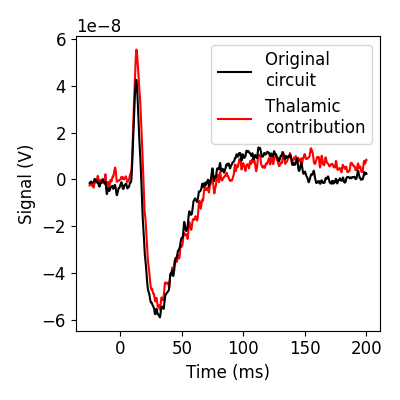

In [274]:
plt.figure(figsize=(4,4))

plt.plot(time,np.sum(contrib_thal[0],axis=0),'r',label="Thalamic \ncontribution")
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k',label="Original \ncircuit")

# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
# plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/10)

# plt.plot(inVivo[:,0],inVivoYR,'grey')
# plt.plot(inVivo[:,0],inVivoY,'orange')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

handles, labels = plt.gca().get_legend_handles_labels()

order = [1,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.tight_layout()
plt.savefig('../../figures/ThreeEEG_1.png',dpi=600)

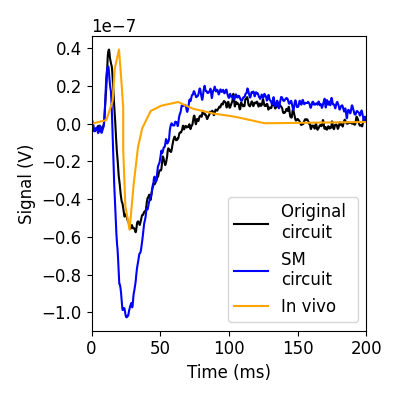

In [67]:
plt.figure(figsize=(4,4))

plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0),'k',label="Original \ncircuit")
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b',label="SM \ncircuit")

# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
# plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/10)

# plt.plot(inVivo[:,0],inVivoYR,'grey')
plt.plot(inVivo[:,0],inVivoY,'orange',label='In vivo')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

handles, labels = plt.gca().get_legend_handles_labels()


order = [0,1,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.xlim([0,200])

plt.tight_layout()
plt.savefig('../../figures/ThreeEEG_3.png',dpi=600)

In [307]:
L5Inh.shape

(2, 7, 2250)

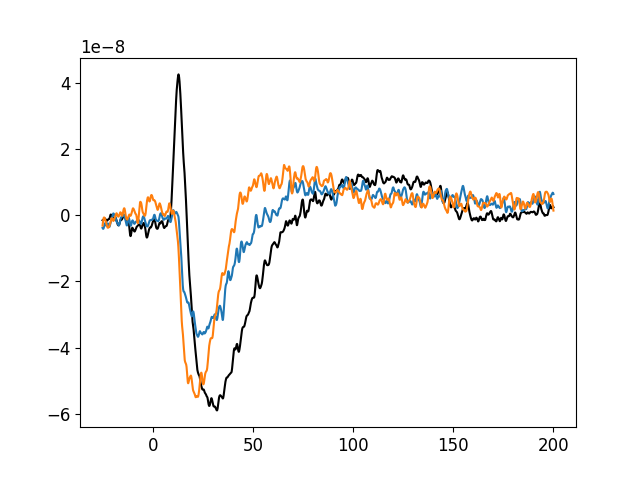

In [312]:
plt.figure()
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k',label="Original \ncircuit")

plt.plot(time,L5Inh[0,5])
plt.plot(time,L5InhD[0,5])

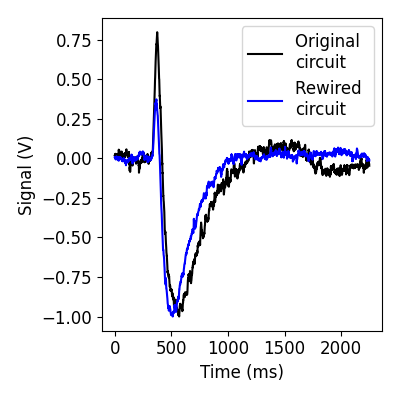

In [75]:
plt.figure(figsize=(4,4))

plt.plot(np.sum(mean_layer_original[0],axis=0)/np.abs(np.min(np.sum(mean_layer_original[0],axis=0))),'k',label="Original \ncircuit")
plt.plot(np.sum(mean_layer_rewired[0],axis=0)/np.abs(np.min(np.sum(mean_layer_rewired[0],axis=0))),'b',label="Rewired \ncircuit")

# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
# plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/10)

# plt.plot(inVivo[:,0],inVivoYR,'grey')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

handles, labels = plt.gca().get_legend_handles_labels()


order = [0,1]#,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.tight_layout()


In [76]:
scaledOrig = np.sum(mean_layer_original[0],axis=0)/np.abs(np.min(np.sum(mean_layer_original[0],axis=0)))
scaledRewired = np.sum(mean_layer_rewired[0],axis=0)/np.abs(np.min(np.sum(mean_layer_rewired[0],axis=0)))

argO1 = np.argmin(np.abs(scaledOrig[:500]+.5))
argO2 = np.argmin(np.abs(scaledOrig[500:]+.5))+500

argR1 = np.argmin(np.abs(scaledRewired[:500]+.5))
argR2 = np.argmin(np.abs(scaledRewired[500:]+.5))+500

timeO = time[argO2]-time[argO1]
timeR = time[argR2]-time[argR1]

print(timeO)
print(timeR)

33.114717652289904
25.11116051578479


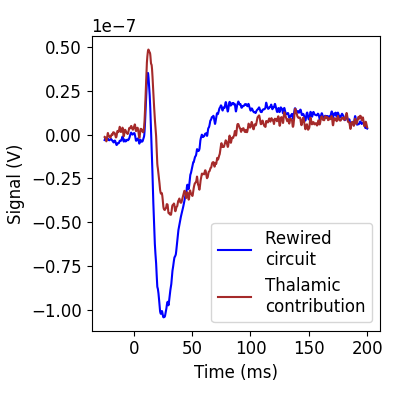

In [276]:
plt.figure(figsize=(4,4))

plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b',label="Rewired \ncircuit")

# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown',label='Thalamic \ncontribution')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/10)

# plt.plot(inVivo[:,0],inVivoYR,'grey')
# plt.plot(inVivo[:,0],inVivoY,'orange')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

handles, labels = plt.gca().get_legend_handles_labels()


order = [0,1]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.tight_layout()
plt.savefig('../../figures/ThreeEEG_2.png',dpi=600)

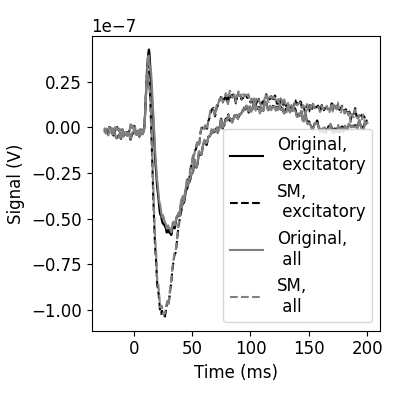

In [78]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'--k')

plt.plot(time,np.sum(mean_layer_original[0],axis=0)+np.sum(mean_layer_original[1],axis=0),'grey')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)+np.sum(mean_layer_rewired[1],axis=0),'--',c='grey')


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['Original,\n excitatory','SM,\n excitatory','Original,\n all','SM,\n all'])

plt.tight_layout()
plt.savefig('../../figures/sumInhExc.png',dpi=600)

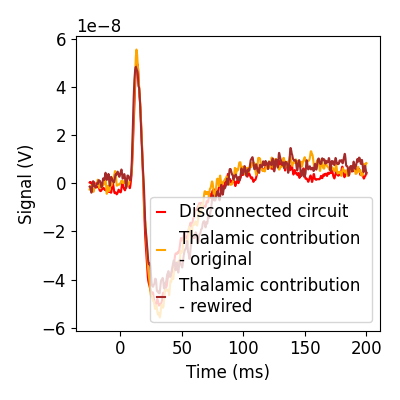

In [278]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_disconnected[0],axis=0),'r')
plt.plot(time,np.sum(contrib_thal[0],axis=0),'orange')
plt.plot(time,np.sum(contrib_thalR[0],axis=0),'brown')

plt.legend(['Disconnected circuit','Thalamic contribution \n- original','Thalamic contribution \n- rewired'],handlelength=0.5)

# plt.plot(time,np.sum(mean_layer_rewiredD[0],axis=0),'r')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')
# plt.plot(time,np.sum(contrib_thalR[0],axis=0))
# plt.plot(time,np.sum(contrib_thal[0],axis=0))

# plt.plot(inVivo[:,0],inVivoYR,'grey')
# plt.plot(inVivo[:,0]-5,inVivoY,'orange')


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/thalamicContributions.png',dpi=600)

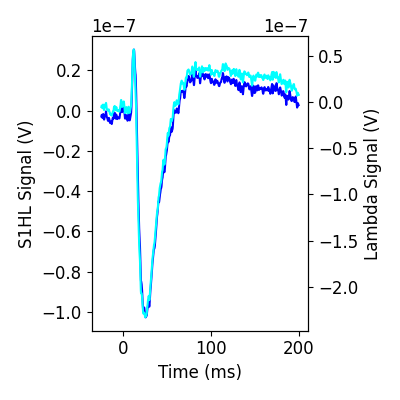

In [68]:
fig, ax = plt.subplots(figsize=(4,4))
ax2 = ax.twinx()
# plt.plot(time,np.sum(mean_layer_test[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_compressed[0],axis=0),'pink')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)/numRewiredSims,'b')
ax.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b')
ax2.plot(time,np.sum(mean_layer_rewired_reference[0]+mean_layer_rewired_reference[1],axis=0),'cyan')

# plt.plot(inVivo[:,0],inVivoYR,'grey')


ax.set_xlabel('Time (ms)')
ax.set_ylabel('S1HL Signal (V)')
ax2.set_ylabel('Lambda Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/reference.png',dpi=600)

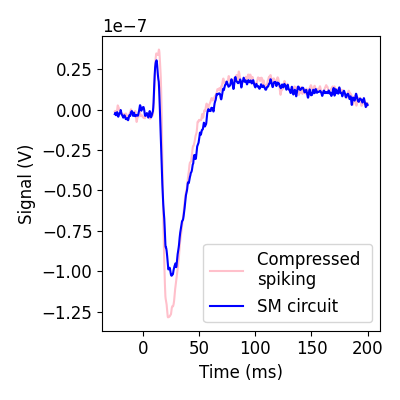

In [70]:
plt.figure(figsize=(4,4))
# plt.plot(time,np.sum(mean_layer_test[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_compressed[0]+mean_layer_compressed[1],axis=0),'pink')
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b')
# plt.plot(time,np.sum(mean_layer_rewired_test[0],axis=0),'b')
# plt.plot(time,np.sum(mean_layer_rewired_reference[0],axis=0)/2.2,'cyan')

# plt.plot(inVivo[:,0],inVivoYR,'grey')

plt.legend(['Compressed \nspiking','SM circuit'])

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/compressed.png',dpi=600)

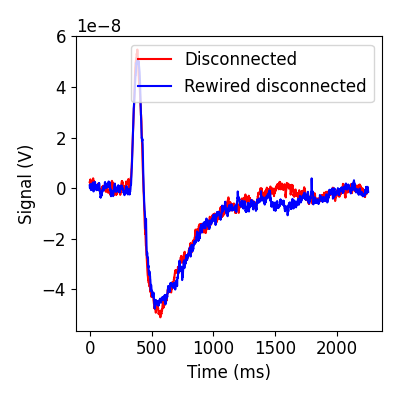

In [82]:
plt.figure(figsize=(4,4))
plt.plot(np.sum(mean_layer_disconnected[0],axis=0),'r')
plt.plot(np.sum(mean_layer_rewiredD[0],axis=0),'b')

plt.legend(['Disconnected','Rewired disconnected'])

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()


In [52]:
np.max(mean_layer_original[0,5,:]) - np.min(mean_layer_original[0,5,:])

7.626531788318402e-08

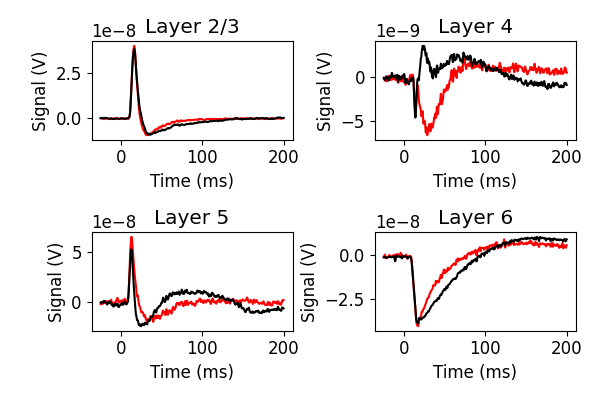

In [281]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    plt.plot(time,contrib_thal[0,layer,:],'r')
    plt.plot(time,mean_layer_original[0,layer,:],'k')
    
    

    # plt.plot(time,mean_layer_rewired[0,layer,:],'b')
    # plt.plot(time,contrib_thalR[0,layer,:],'brown')
    
    # plt.plot(mean_layer_rewiredD[0,layer,:])
    # plt.plot(mean_layer_rewiredDS[0,layer,:])
    # plt.plot(mean_layer_L23[0,layer,:])
    # plt.plot(mean_layer_L5[0,layer,:])
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)


plt.tight_layout()
plt.savefig('../../figures/EEGbyLayer_1.png',dpi=600)

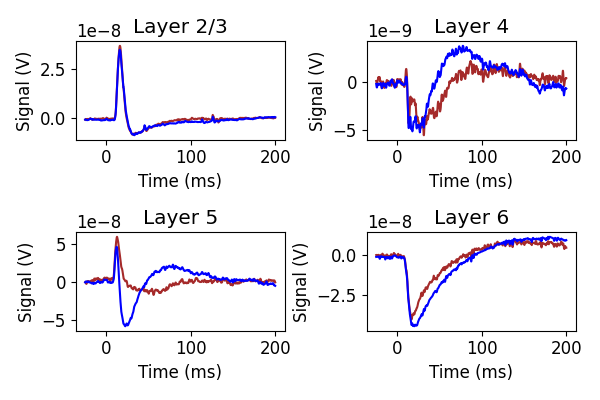

In [282]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    plt.plot(time,contrib_thalR[0,layer,:],'brown')
    plt.plot(time,mean_layer_rewired[0,layer,:],'b')
    
    

    # plt.plot(time,mean_layer_rewired[0,layer,:],'b')
    # plt.plot(time,contrib_thalR[0,layer,:],'brown')
    
    # plt.plot(mean_layer_rewiredD[0,layer,:])
    # plt.plot(mean_layer_rewiredDS[0,layer,:])
    # plt.plot(mean_layer_L23[0,layer,:])
    # plt.plot(mean_layer_L5[0,layer,:])
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)


plt.tight_layout()
plt.savefig('../../figures/EEGbyLayer_2.png',dpi=600)

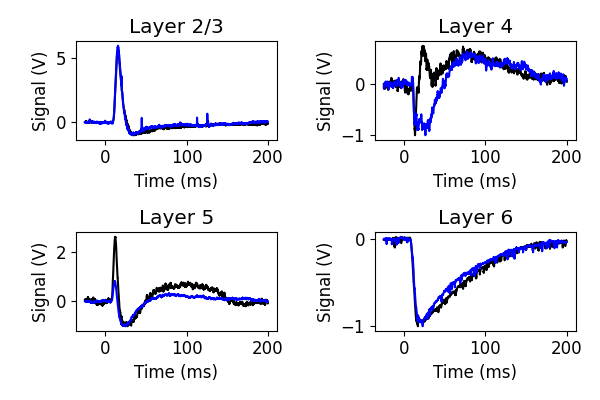

In [85]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    plt.plot(time,mean_layer_original[0,layer,:]/np.abs(np.min(mean_layer_original[0,layer,:])),'k')
    plt.plot(time,mean_layer_rewired[0,layer,:]/np.abs(np.min(mean_layer_rewired[0,layer,:])),'b')
    
    

    # plt.plot(time,mean_layer_rewired[0,layer,:],'b')
    # plt.plot(time,contrib_thalR[0,layer,:],'brown')
    
    # plt.plot(mean_layer_rewiredD[0,layer,:])
    # plt.plot(mean_layer_rewiredDS[0,layer,:])
    # plt.plot(mean_layer_L23[0,layer,:])
    # plt.plot(mean_layer_L5[0,layer,:])
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)


plt.tight_layout()


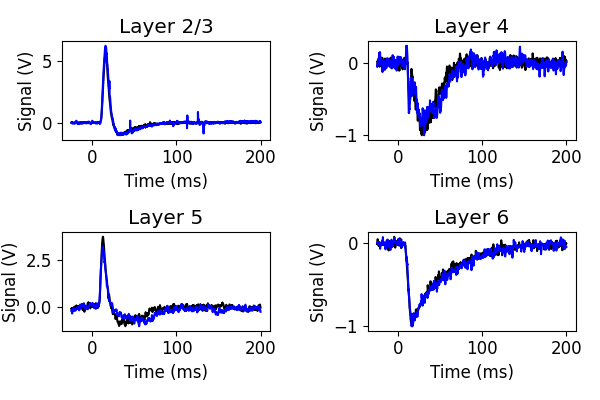

In [86]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    plt.plot(time,contrib_thal[0,layer,:]/np.abs(np.min(contrib_thal[0,layer,:])),'k')
    plt.plot(time,contrib_thalR[0,layer,:]/np.abs(np.min(contrib_thalR[0,layer,:])),'b')
    
    

    # plt.plot(time,mean_layer_rewired[0,layer,:],'b')
    # plt.plot(time,contrib_thalR[0,layer,:],'brown')
    
    # plt.plot(mean_layer_rewiredD[0,layer,:])
    # plt.plot(mean_layer_rewiredDS[0,layer,:])
    # plt.plot(mean_layer_L23[0,layer,:])
    # plt.plot(mean_layer_L5[0,layer,:])
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)


plt.tight_layout()

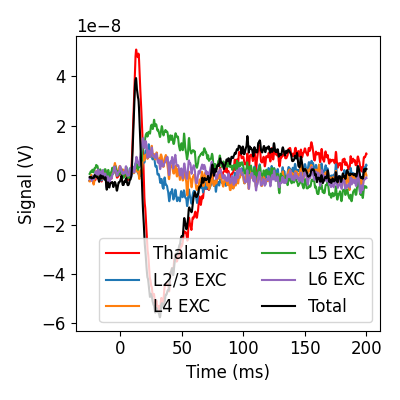

In [72]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution\n by presnyaptic layer')

plt.plot(time,np.sum(contrib_thal[0]+contrib_thal[1],axis=0),'r')
plt.plot(time,np.sum(L23Exc[0]+L23Exc[1],axis=0))
plt.plot(time,np.sum(L4Exc[0]+L4Exc[1],axis=0))
plt.plot(time,np.sum(L5Exc[0]+L5Exc[1],axis=0))
plt.plot(time,np.sum(L6Exc[0]+L6Exc[1],axis=0),'tab:purple')

# plt.plot(np.sum(L23Exc[0]/10,axis=0)+np.sum(L4Exc[0]/10,axis=0)+np.sum(L5Exc[0]/10,axis=0)+np.sum(L6Exc[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0),'k')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['Thalamic','L2/3 EXC','L4 EXC','L5 EXC','L6 EXC','Total'],ncol=2,loc='lower right')

plt.tight_layout()

plt.savefig('../../figures/CorticoCortical.png',dpi=600)

# plt.plot(np.sum(L23Inh[0],axis=0),'c')
# plt.plot(np.sum(L4Inh[0],axis=0),'c')
# plt.plot(np.sum(L5Inh[0],axis=0),'c')
# plt.plot(np.sum(L6Inh[0],axis=0),'c')

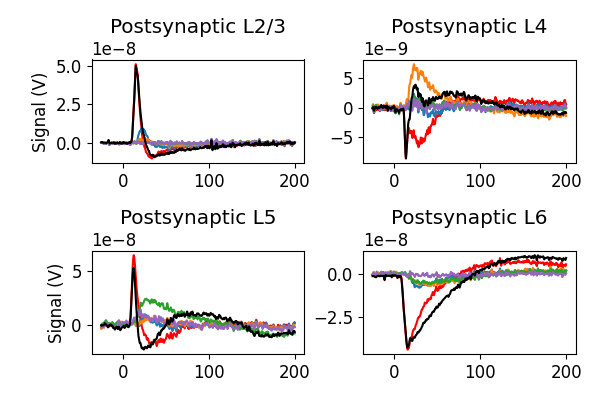

In [73]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    plt.plot(time,contrib_thal[0,layer,:]+contrib_thal[1,layer,:],'r')
    plt.plot(time,L23Exc[0,layer,:]+L23Exc[1,layer,:])
    
    plt.plot(time,L4Exc[0,layer,:]+L4Exc[1,layer,:])
    plt.plot(time,L5Exc[0,layer,:]+L5Exc[1,layer,:])
    plt.plot(time,L6Exc[0,layer,:]+L6Exc[1,layer,:],'tab:purple')

    plt.plot(time,mean_layer_original[0,layer,:]+mean_layer_original[1,layer,:],'k')

    # plt.xlabel('Time (ms)')

    if i%2 == 0:
        plt.ylabel('Signal (V)')

    if i == 0:
        title = 'Postsynaptic L2/3'
    else:
        title = 'Postsynaptic L'+str(layer)
    plt.title(title)

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalByLayer.png',dpi=600)

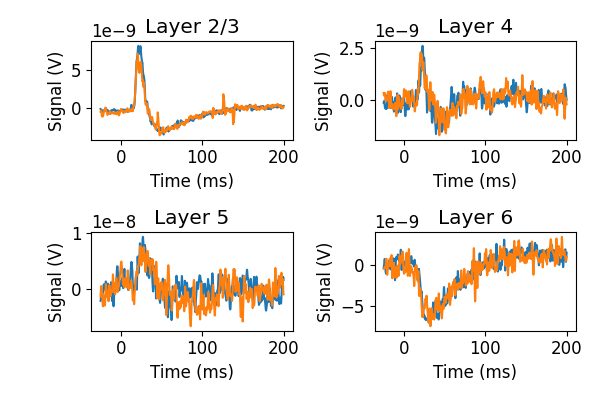

In [285]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)
    
    plt.plot(time,L23Exc[0,layer,:])
    # plt.plot(time,L4Exc[0,layer,:])
    # plt.plot(time,L5Exc[0,layer,:])
    # plt.plot(time,L6Exc[0,layer,:])

    plt.plot(time,L23ExcD[0,layer,:])
    # plt.plot(time,L4ExcD[0,layer,:])
    # plt.plot(time,L5ExcD[0,layer,:])
    # plt.plot(time,L6ExcD[0,layer,:])


    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

    if i == 0:
        title = 'Layer 2/3'
    else:
        title = 'Layer '+str(layer)
    plt.title(title)

plt.tight_layout()


In [81]:
tIdx0 = np.argmin(np.abs(time-8))
tIdx1 = np.argmin(np.abs(time-16))

tIdx2 = np.argmin(np.abs(time-35))

tIdx3 = np.argmin(np.abs(time-35))
tIdx4 = np.argmin(np.abs(time-70))


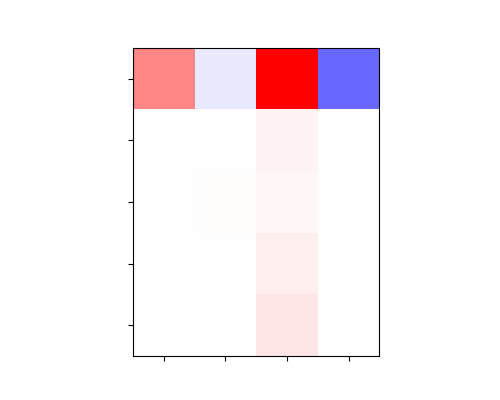

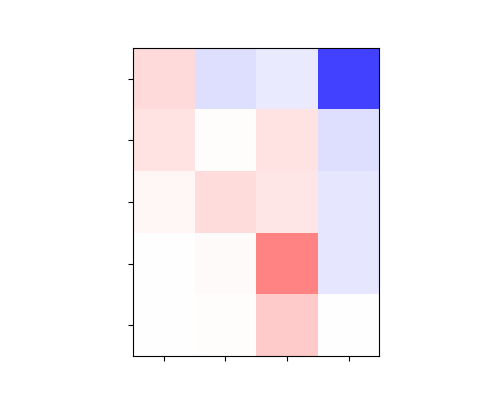

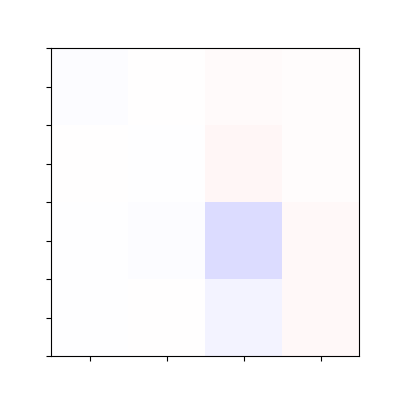

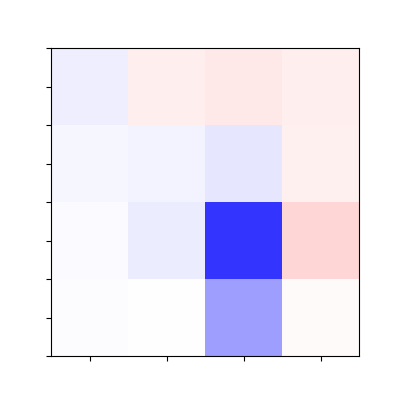

In [82]:
maxThal = np.mean(contrib_thal[0,:,tIdx0:tIdx1]+contrib_thal[1,:,tIdx0:tIdx1],axis=1)
maxL23Exc = np.mean(L23Exc[0,:,tIdx0:tIdx1]+L23Exc[1,:,tIdx0:tIdx1],axis=1)
maxL4Exc = np.mean(L4Exc[0,:,tIdx0:tIdx1]+L4Exc[1,:,tIdx0:tIdx1],axis=1)
maxL5Exc = np.mean(L5Exc[0,:,tIdx0:tIdx1]+L5Exc[1,:,tIdx0:tIdx1],axis=1)
maxL6Exc = np.mean(L6Exc[0,:,tIdx0:tIdx1]+L6Exc[1,:,tIdx0:tIdx1],axis=1)

minThal = np.mean(contrib_thal[0,:,tIdx1:tIdx2]+contrib_thal[1,:,tIdx1:tIdx2],axis=1)
minL23Exc = np.mean(L23Exc[0,:,tIdx1:tIdx2]+L23Exc[1,:,tIdx1:tIdx2],axis=1)
minL4Exc = np.mean(L4Exc[0,:,tIdx1:tIdx2]+L4Exc[1,:,tIdx1:tIdx2],axis=1)
minL5Exc = np.mean(L5Exc[0,:,tIdx1:tIdx2]+L5Exc[1,:,tIdx1:tIdx2],axis=1)
minL6Exc = np.mean(L6Exc[0,:,tIdx1:tIdx2]+L6Exc[1,:,tIdx1:tIdx2],axis=1)

maxL23Inh = np.mean(L23Inh[0,:,tIdx0:tIdx1]+L23Inh[1,:,tIdx0:tIdx1],axis=1)
maxL4Inh = np.mean(L4Inh[0,:,tIdx0:tIdx1]+L4Inh[1,:,tIdx0:tIdx1],axis=1)
maxL5Inh = np.mean(L5Inh[0,:,tIdx0:tIdx1]+L5Inh[1,:,tIdx0:tIdx1],axis=1)
maxL6Inh = np.mean(L6Inh[0,:,tIdx0:tIdx1]+L6Inh[1,:,tIdx0:tIdx1],axis=1)

minL23Inh = np.mean(L23Inh[0,:,tIdx1:tIdx2]+L23Inh[1,:,tIdx1:tIdx2],axis=1)
minL4Inh = np.mean(L4Inh[0,:,tIdx1:tIdx2]+L4Inh[1,:,tIdx1:tIdx2],axis=1)
minL5Inh = np.mean(L5Inh[0,:,tIdx1:tIdx2]+L5Inh[1,:,tIdx1:tIdx2],axis=1)
minL6Inh = np.mean(L6Inh[0,:,tIdx1:tIdx2]+L6Inh[1,:,tIdx1:tIdx2],axis=1)

excMax = np.array([maxThal,maxL23Exc,maxL4Exc,maxL5Exc,maxL6Exc])[:,[2,4,5,6]]
excMin = np.array([minThal,minL23Exc,minL4Exc,minL5Exc,minL6Exc])[:,[2,4,5,6]]
inhMax = np.array([maxL23Inh,maxL4Inh,maxL5Inh,maxL6Inh])[:,[2,4,5,6]]
inhMin = np.array([minL23Inh,minL4Inh,minL5Inh,minL6Inh])[:,[2,4,5,6]]

plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(excMax,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(5),labels=['Thalamic','L2/3','L4','L5','L6'])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_ylabel('Excitatory \npresynaptic')
# plt.title('P1')
# plt.tight_layout()
plt.savefig('../../figures/originalMatrix_1.png',dpi=600)

plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(excMin,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(5),labels=['Thalamic','L2/3','L4','L5','L6'])
ax.set_xticklabels([])
ax.set_yticklabels([])
# plt.title('N1')
# plt.tight_layout()
plt.savefig('../../figures/originalMatrix_2.png',dpi=600)


plt.figure(figsize=(4,4))
ax = plt.gca()
plt.imshow(inhMax,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_xlabel('postsynaptic')
# ax.set_ylabel('Inhibitory\npresynaptic')
ax.set_xticklabels([])
ax.set_yticklabels([])
# plt.tight_layout()
plt.savefig('../../figures/originalMatrix_3.png',dpi=600)

plt.figure(figsize=(4,4))
ax = plt.gca()
plt.imshow(inhMin,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_xlabel('postsynaptic')

# plt.tight_layout()

plt.savefig('../../figures/originalMatrix_4.png',dpi=600)

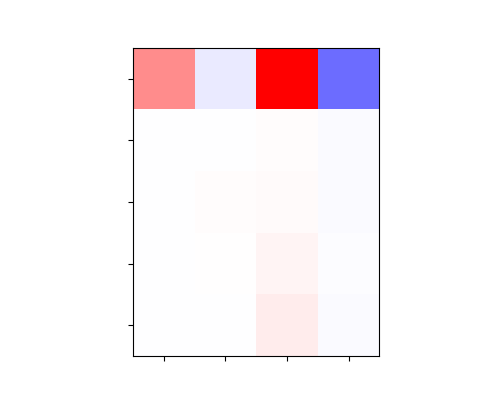

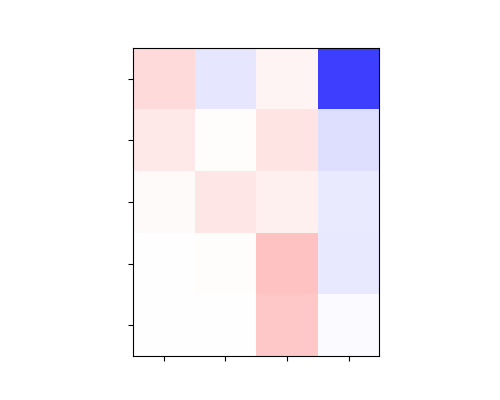

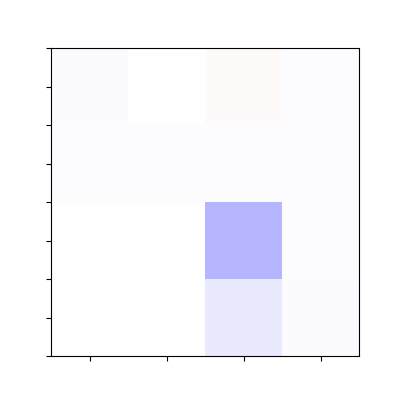

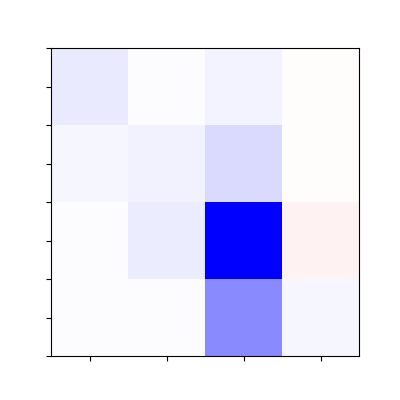

In [83]:
maxThal = np.mean(contrib_thalR[0,:,tIdx0:tIdx1]+contrib_thalR[1,:,tIdx0:tIdx1],axis=1)
maxL23Exc = np.mean(L23ExcD[0,:,tIdx0:tIdx1]+L23ExcD[1,:,tIdx0:tIdx1],axis=1)
maxL4Exc = np.mean(L4ExcD[0,:,tIdx0:tIdx1]+L4ExcD[1,:,tIdx0:tIdx1],axis=1)
maxL5Exc = np.mean(L5ExcD[0,:,tIdx0:tIdx1]+L5ExcD[1,:,tIdx0:tIdx1],axis=1)
maxL6Exc = np.mean(L6ExcD[0,:,tIdx0:tIdx1]+L6ExcD[1,:,tIdx0:tIdx1],axis=1)

minThal = np.mean(contrib_thalR[0,:,tIdx1:tIdx2]+contrib_thalR[1,:,tIdx1:tIdx2],axis=1)
minL23Exc = np.mean(L23ExcD[0,:,tIdx1:tIdx2]+L23ExcD[1,:,tIdx1:tIdx2],axis=1)
minL4Exc = np.mean(L4ExcD[0,:,tIdx1:tIdx2]+L4ExcD[1,:,tIdx1:tIdx2],axis=1)
minL5Exc = np.mean(L5ExcD[0,:,tIdx1:tIdx2]+L5ExcD[1,:,tIdx1:tIdx2],axis=1)
minL6Exc = np.mean(L6ExcD[0,:,tIdx1:tIdx2]+L6ExcD[1,:,tIdx1:tIdx2],axis=1)

maxL23Inh = np.mean(L23InhD[0,:,tIdx0:tIdx1]+L23InhD[1,:,tIdx0:tIdx1],axis=1)
maxL4Inh = np.mean(L4InhD[0,:,tIdx0:tIdx1]+L4InhD[1,:,tIdx0:tIdx1],axis=1)
maxL5Inh = np.mean(L5InhD[0,:,tIdx0:tIdx1]+L5InhD[1,:,tIdx0:tIdx1],axis=1)
maxL6Inh = np.mean(L6InhD[0,:,tIdx0:tIdx1]+L6InhD[1,:,tIdx0:tIdx1],axis=1)

minL23Inh = np.mean(L23InhD[0,:,tIdx1:tIdx2]+L23InhD[1,:,tIdx1:tIdx2],axis=1)
minL4Inh = np.mean(L4InhD[0,:,tIdx1:tIdx2]+L4InhD[1,:,tIdx1:tIdx2],axis=1)
minL5Inh = np.mean(L5InhD[0,:,tIdx1:tIdx2]+L5InhD[1,:,tIdx1:tIdx2],axis=1)
minL6Inh = np.mean(L6InhD[0,:,tIdx1:tIdx2]+L6InhD[1,:,tIdx1:tIdx2],axis=1)

excMaxD = np.array([maxThal,maxL23Exc,maxL4Exc,maxL5Exc,maxL6Exc])[:,[2,4,5,6]]
excMinD = np.array([minThal,minL23Exc,minL4Exc,minL5Exc,minL6Exc])[:,[2,4,5,6]]
inhMaxD = np.array([maxL23Inh,maxL4Inh,maxL5Inh,maxL6Inh])[:,[2,4,5,6]]
inhMinD = np.array([minL23Inh,minL4Inh,minL5Inh,minL6Inh])[:,[2,4,5,6]]

plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(excMaxD,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(5),labels=['Thalamic','L2/3','L4','L5','L6'])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_ylabel('Excitatory \npresynaptic')
# plt.title('P1')
# plt.tight_layout()
plt.savefig('../../figures/rewiredMatrix_1.png',dpi=600)

plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(excMinD,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(5),labels=['Thalamic','L2/3','L4','L5','L6'])
ax.set_xticklabels([])
ax.set_yticklabels([])
# plt.title('N1')
# plt.tight_layout()
plt.savefig('../../figures/rewiredMatrix_2.png',dpi=600)


plt.figure(figsize=(4,4))
ax = plt.gca()
plt.imshow(inhMaxD,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_xlabel('postsynaptic')
# ax.set_ylabel('Inhibitory\npresynaptic')
ax.set_xticklabels([])
ax.set_yticklabels([])
# plt.tight_layout()
plt.savefig('../../figures/rewiredMatrix_3.png',dpi=600)

plt.figure(figsize=(4,4))
ax = plt.gca()
plt.imshow(inhMinD,vmin=-4e-8,vmax=4e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_xlabel('postsynaptic')

# plt.tight_layout()

plt.savefig('../../figures/rewiredMatrix_4.png',dpi=600)

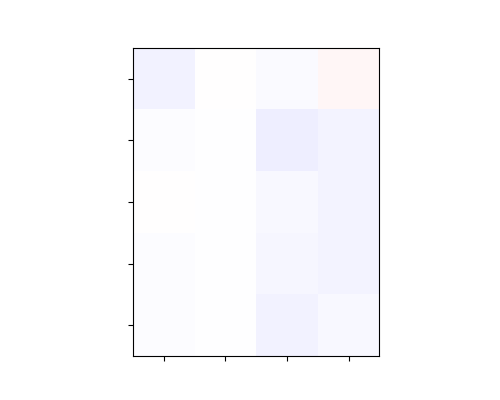

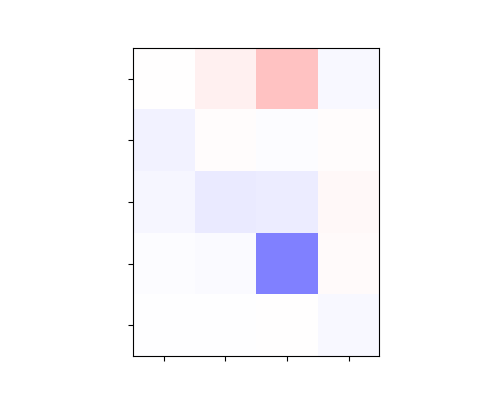

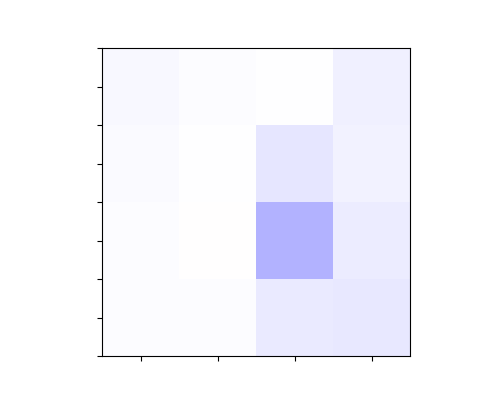

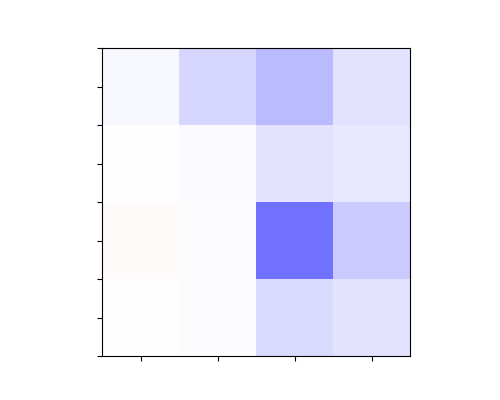

In [84]:
plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(excMaxD-excMax,vmin=-2e-8,vmax=2e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_ylabel('presynaptic')
# plt.title('P1')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('../../figures/differenceMatrix_1.png',dpi=600)

plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(excMinD-excMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# plt.title('N1')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('../../figures/differenceMatrix_2.png',dpi=600)


plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(inhMaxD-inhMax,vmin=-2e-8,vmax=2e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_xlabel('postsynaptic')
# ax.set_ylabel('presynaptic')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('../../figures/differenceMatrix_3.png',dpi=600)

plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(inhMinD-inhMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
# plt.colorbar()
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_xlabel('postsynaptic')
ax.set_xticklabels([])
ax.set_yticklabels([])

# plt.tight_layout()
plt.savefig('../../figures/differenceMatrix_4.png',dpi=600)

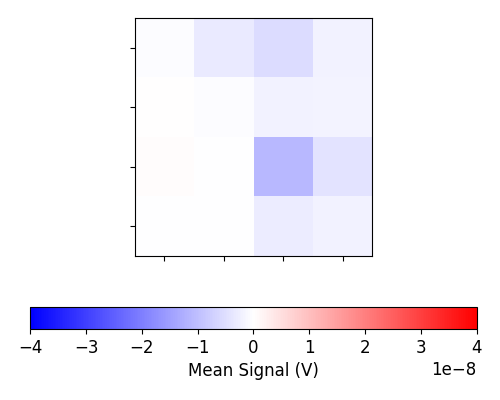

In [85]:
plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(inhMinD-inhMin,vmin=-4e-8,vmax=4e-8,cmap='bwr')
plt.colorbar(label = 'Mean Signal (V)', location='bottom')
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_xlabel('postsynaptic')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('../../figures/matrixColorBar.png',dpi=600)

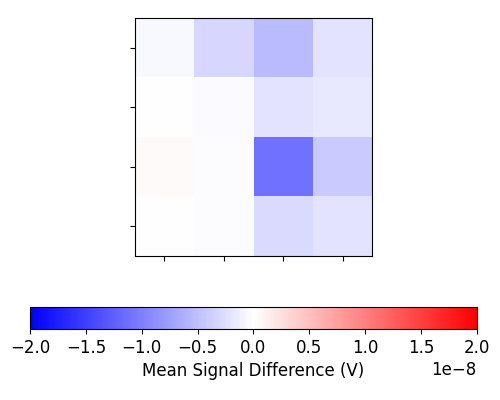

In [86]:
plt.figure(figsize=(5,4))
ax = plt.gca()
plt.imshow(inhMinD-inhMin,vmin=-2e-8,vmax=2e-8,cmap='bwr')
plt.colorbar(label = 'Mean Signal Difference (V)', location='bottom')
# ax.set_xticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_yticks(np.arange(4),labels=['L2/3','L4','L5','L6'])
# ax.set_xlabel('postsynaptic')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('../../figures/matrixColorBar_2.png',dpi=600)

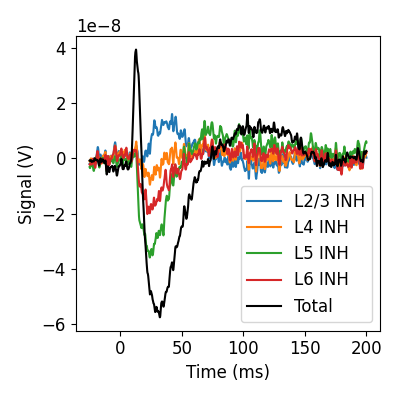

In [88]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution by presnyaptic layer')

# plt.plot(time,np.sum(L1Inh[0]/10,axis=0))
plt.plot(time,np.sum(L23Inh[0]+L23Inh[1],axis=0))
plt.plot(time,np.sum(L4Inh[0]+L4Inh[1],axis=0))
plt.plot(time,np.sum(L5Inh[0]+L5Inh[1],axis=0))
plt.plot(time,np.sum(L6Inh[0]+L6Inh[1],axis=0))

# plt.plot(np.sum(L23Inh[0]/10,axis=0)+np.sum(L4Inh[0]/10,axis=0)+np.sum(L5Inh[0]/10,axis=0)+np.sum(L6Inh[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0),'k')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['L2/3 INH','L4 INH','L5 INH','L6 INH','Total'])

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalInh.png',dpi=600)

# plt.plot(np.sum(L23Inh[0],axis=0),'c')
# plt.plot(np.sum(L4Inh[0],axis=0),'c')
# plt.plot(np.sum(L5Inh[0],axis=0),'c')
# plt.plot(np.sum(L6Inh[0],axis=0),'c')

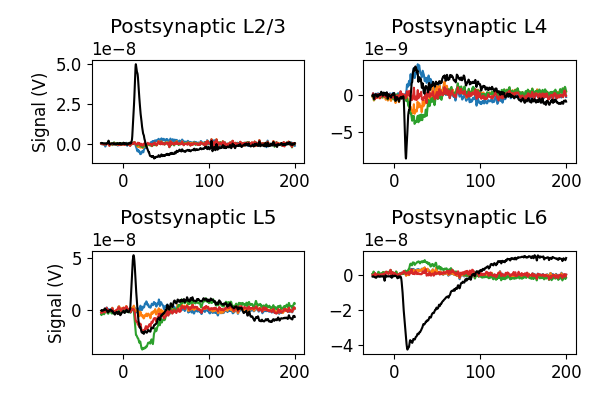

In [89]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)
    
    plt.plot(time,L23Inh[0,layer,:]+L23Inh[1,layer,:])
    
    plt.plot(time,L4Inh[0,layer,:]+L4Inh[1,layer,:])
    plt.plot(time,L5Inh[0,layer,:]+L5Inh[1,layer,:])
    plt.plot(time,L6Inh[0,layer,:]+L6Inh[1,layer,:])

    plt.plot(time,mean_layer_original[0,layer,:]+mean_layer_original[1,layer,:],'k')

    # plt.xlabel('Time (ms)')

    if i%2 == 0:
        plt.ylabel('Signal (V)')
    
    if i == 0:
        title = 'Postsynaptic L2/3'
    else:
        title = 'Postsynaptic L'+str(layer)
    plt.title(title)

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalByLayerInh.png',dpi=600)
    

In [104]:
def optFun(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    inhTotal = coeffs[0]*np.sum(L23Inh[0],axis=0)+coeffs[1]*np.sum(L4Inh[0],axis=0)+coeffs[2]*np.sum(L5Inh[0],axis=0)+coeffs[3]*np.sum(L6Inh[0],axis=0)
    excTotal = coeffs[4]*np.sum(L23Exc[0],axis=0)+coeffs[5]*np.sum(L4Exc[0],axis=0)+coeffs[6]*np.sum(L5Exc[0],axis=0)+coeffs[7]*np.sum(L6Exc[0],axis=0)

    total = coeffs[8] *np.sum(disconnected[0],axis=0)+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    error = np.linalg.norm(inVivoY[:100]-newTotal[:100])

    return error

def optResult(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    inhTotal = coeffs[0]*np.sum(L23Inh[0],axis=0)+coeffs[1]*np.sum(L4Inh[0],axis=0)+coeffs[2]*np.sum(L5Inh[0],axis=0)+coeffs[3]*np.sum(L6Inh[0],axis=0)
    excTotal = coeffs[4]*np.sum(L23Exc[0],axis=0)+coeffs[5]*np.sum(L4Exc[0],axis=0)+coeffs[6]*np.sum(L5Exc[0],axis=0)+coeffs[7]*np.sum(L6Exc[0],axis=0)

    total = coeffs[8] *np.sum(disconnected[0],axis=0)+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    plt.figure(figsize=(4,4))
    plt.plot(inVivoX-5,inVivoY,'orange')
    plt.plot(time[timeIndex],newTotal,'k')
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')
    plt.legend(['In vivo','Optimized'])
    plt.tight_layout()
    plt.savefig('../../figures/optimization_rewired.png',dpi=600)



In [105]:
from scipy.optimize import minimize
coeffs = np.ones(9)
b = []
for i in range(9):
    b.append((.5,2))
result = minimize(optFun,coeffs,(time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,mean_layer_disconnected,inVivo[:,0],inVivoY),method='Nelder-Mead',bounds=b,options={'maxiter':10000})


In [106]:
from scipy.optimize import minimize
coeffs = np.ones(9)
b = []
for i in range(9):
    b.append((.25,4))
result = minimize(optFun,coeffs,(time,L23InhD,L4InhD,L5InhD,L6InhD,L23ExcD,L4ExcD,L5ExcD,L6ExcD,mean_layer_rewiredD,inVivo[:,0],inVivoY),method='Nelder-Mead',bounds=b,options={'maxiter':10000})


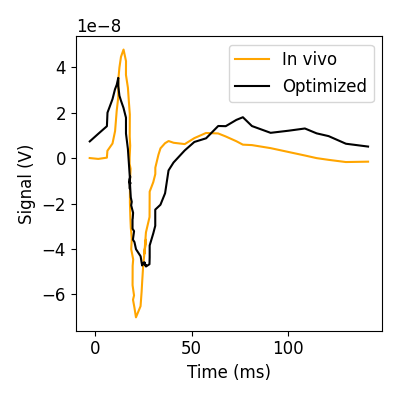

In [107]:
optResult(result['x'],time,L23InhD,L4InhD,L5InhD,L6InhD,L23ExcD,L4ExcD,L5ExcD,L6ExcD,mean_layer_rewiredD,inVivo[:,0],inVivoY)


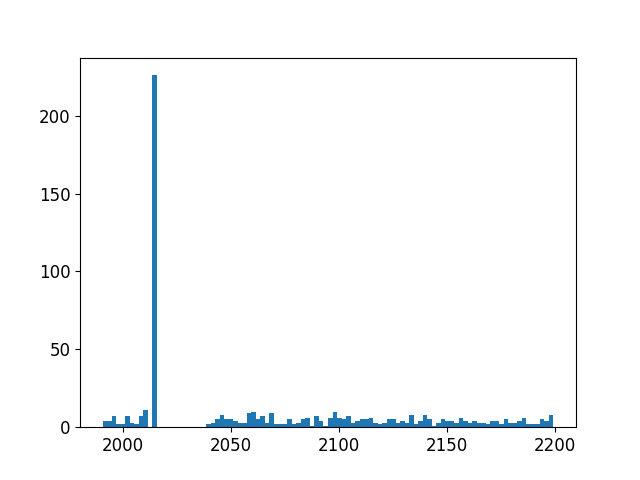

In [108]:
import h5py
f = h5py.File('/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/whiskerFlick/L5PeriTC_rewired/L5PeriTC_rewired_0.h5')
spiketimes = f['spikes']['S1nonbarrel_neurons']['timestamps'][:]
plt.figure()
plt.hist(spiketimes[spiketimes>1990],bins=100)
plt.show()

In [109]:
def optFun(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    coeffs0 = coeffs[0:7][:,np.newaxis]
    coeffs1 = coeffs[7:14][:,np.newaxis]
    coeffs2 = coeffs[14:21][:,np.newaxis]
    coeffs3 = coeffs[21:28][:,np.newaxis]

    coeffs4 = coeffs[28:35][:,np.newaxis]
    coeffs5 = coeffs[35:42][:,np.newaxis]
    coeffs6 = coeffs[42:49][:,np.newaxis]
    coeffs7 = coeffs[49:56][:,np.newaxis]

    coeffs8 = coeffs[56:63][:,np.newaxis]

    inhTotal = np.sum(coeffs0*L23Inh[0],axis=0)+np.sum(coeffs1*L4Inh[0],axis=0)+np.sum(coeffs2*L5Inh[0],axis=0)+np.sum(coeffs3*L6Inh[0],axis=0)
    excTotal = np.sum(coeffs4*L23Exc[0],axis=0)+np.sum(coeffs5*L4Exc[0],axis=0)+np.sum(coeffs6*L5Exc[0],axis=0)+np.sum(coeffs7*L6Exc[0],axis=0)

    total = np.sum(coeffs8 * disconnected[0],axis=0)+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    error = np.linalg.norm(inVivoY[:100]-newTotal[:100])

    return error

def optResult(coeffs,time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,disconnected,inVivoX,inVivoY):

    coeffs0 = coeffs[0:7][:,np.newaxis]
    coeffs1 = coeffs[7:14][:,np.newaxis]
    coeffs2 = coeffs[14:21][:,np.newaxis]
    coeffs3 = coeffs[21:28][:,np.newaxis]

    coeffs4 = coeffs[28:35][:,np.newaxis]
    coeffs5 = coeffs[35:42][:,np.newaxis]
    coeffs6 = coeffs[42:49][:,np.newaxis]
    coeffs7 = coeffs[49:56][:,np.newaxis]

    coeffs8 = coeffs[56:63][:,np.newaxis]

    inhTotal = np.sum(coeffs0*L23Inh[0],axis=0)+np.sum(coeffs1*L4Inh[0],axis=0)+np.sum(coeffs2*L5Inh[0],axis=0)+np.sum(coeffs3*L6Inh[0],axis=0)
    excTotal = np.sum(coeffs4*L23Exc[0],axis=0)+np.sum(coeffs5*L4Exc[0],axis=0)+np.sum(coeffs6*L5Exc[0],axis=0)+np.sum(coeffs7*L6Exc[0],axis=0)

    total = np.sum(coeffs8 * disconnected[0],axis=0)/10+inhTotal+excTotal

    timeIndex = []

    for t in inVivoX:
        timeIndex.append(np.argmin(np.abs(t-time-5)))

    newTotal = total[timeIndex]

    newTotal = np.convolve(np.ones(10),newTotal,mode='same')/10

    plt.figure()
    plt.plot(inVivoX-5,inVivoY)
    plt.plot(time[timeIndex],newTotal)



In [110]:
from scipy.optimize import minimize
coeffs = np.ones(64)
b = []
for i in range(64):
    b.append((.5,2))
result = minimize(optFun,coeffs,(time,L23Inh,L4Inh,L5Inh,L6Inh,L23Exc,L4Exc,L5Exc,L6Exc,mean_layer_disconnected,inVivo[:,0],inVivoY),method='Nelder-Mead',bounds=b,options={'maxiter':10000})



Text(0.5, 1.0, 'Original circuit')

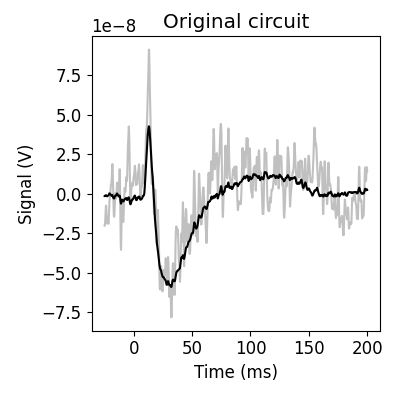

In [89]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
#inhTotal += np.sum(L23Inh[1],axis=0)+np.sum(L4Inh[1],axis=0)+np.sum(L5Inh[1],axis=0)+np.sum(L6Inh[1],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)
#excTotal += np.sum(L23Exc[1],axis=0)+np.sum(L4Exc[1],axis=0)+np.sum(L5Exc[1],axis=0)+np.sum(L6Exc[1],axis=0)

# plt.plot(excTotal)
t = np.sum(contrib_thal[0],axis=0)+inhTotal+excTotal
# t = np.convolve(np.ones(5),t,mode='same')/5
# plt.plot(time,inhTotal,'r')
# plt.plot(time,excTotal)
plt.plot(time,t,'silver')
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
# plt.legend(['Sum of contributions','Signal in connected circuit'],handlelength=0.5)
plt.tight_layout()
plt.title('Original circuit')

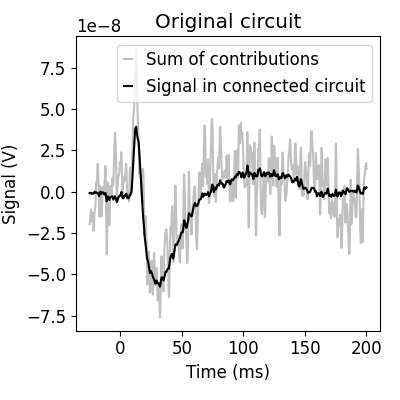

In [104]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L1InhD[0],axis=0)+np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
inhTotal += np.sum(L1InhD[1],axis=0)+np.sum(L23Inh[1],axis=0)+np.sum(L4Inh[1],axis=0)+np.sum(L5Inh[1],axis=0)+np.sum(L6Inh[1],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)
excTotal += np.sum(L23Exc[1],axis=0)+np.sum(L4Exc[1],axis=0)+np.sum(L5Exc[1],axis=0)+np.sum(L6Exc[1],axis=0)

# plt.plot(excTotal)
t = np.sum(contrib_thal[0]+contrib_thal[1],axis=0)+inhTotal+excTotal
# t = np.convolve(np.ones(5),t,mode='same')/5
# plt.plot(time,inhTotal,'r')
# plt.plot(time,excTotal)
plt.plot(time,t,'silver')
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Sum of contributions','Signal in connected circuit'],handlelength=0.5)
plt.tight_layout()
plt.title('Original circuit')
plt.savefig('../../figures/sumOfContributions.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

Text(0.5, 1.0, 'Original circuit')

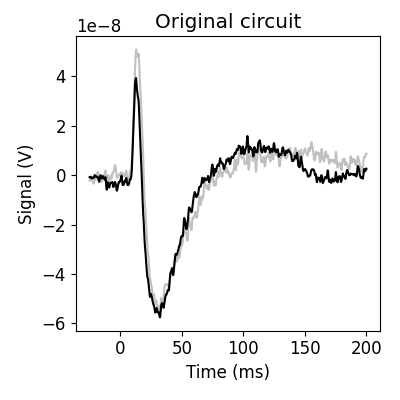

In [121]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L1InhD[0],axis=0)+np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
inhTotal += np.sum(L1InhD[1],axis=0)+np.sum(L23Inh[1],axis=0)+np.sum(L4Inh[1],axis=0)+np.sum(L5Inh[1],axis=0)+np.sum(L6Inh[1],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)
excTotal += np.sum(L23Exc[1],axis=0)+np.sum(L4Exc[1],axis=0)+np.sum(L5Exc[1],axis=0)+np.sum(L6Exc[1],axis=0)

# plt.plot(excTotal)
t = np.sum(contrib_thal[0]+contrib_thal[1],axis=0)
# t = np.convolve(np.ones(5),t,mode='same')/5
# plt.plot(time,inhTotal,'r')
# plt.plot(time,excTotal)
plt.plot(time,t,'silver')
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.tight_layout()
plt.title('Original circuit')
# plt.plot(inVivo[:,0],inVivoY,'grey')

In [366]:
FWHM(t)

27.11204979991107

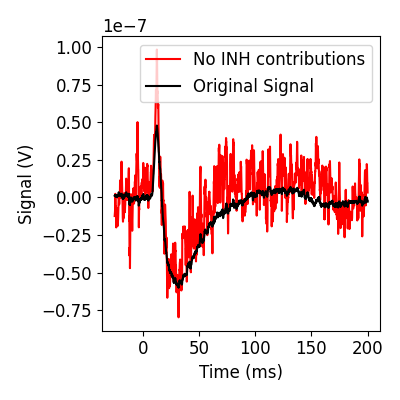

In [114]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L23Inh[0],axis=0)+np.sum(L4Inh[0],axis=0)+np.sum(L5Inh[0],axis=0)+np.sum(L6Inh[0],axis=0)
excTotal = np.sum(L23Exc[0],axis=0)+np.sum(L4Exc[0],axis=0)+np.sum(L5Exc[0],axis=0)+np.sum(L6Exc[0],axis=0)

# plt.plot(excTotal)
t = np.sum(mean_layer_disconnected[0],axis=0)+excTotal+inhTotal
# t = np.convolve(np.ones(5),t,mode='same')/5
plt.plot(time,t,'r')
# plt.plot(inhTotal+excTotal)
# plt.plot(np.sum(mean_layer_disconnected[0],axis=0)/10)
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['No INH contributions','Original Signal'])
plt.tight_layout()
plt.savefig('../../figures/noInh.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

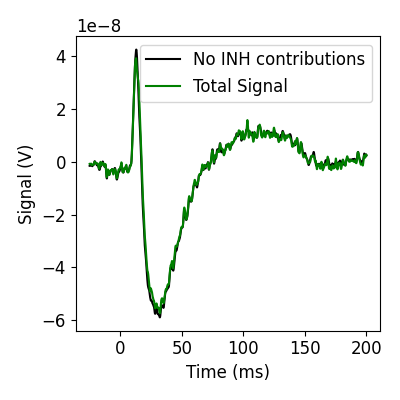

In [295]:
plt.figure(figsize=(4,4))

plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_original[0],axis=0)+np.sum(mean_layer_original[1],axis=0),'green')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['No INH contributions','Total Signal'])
plt.tight_layout()
plt.savefig('../../figures/plusInh.png',dpi=600)
# plt.plot(inVivo[:,0],inVivoY,'grey')

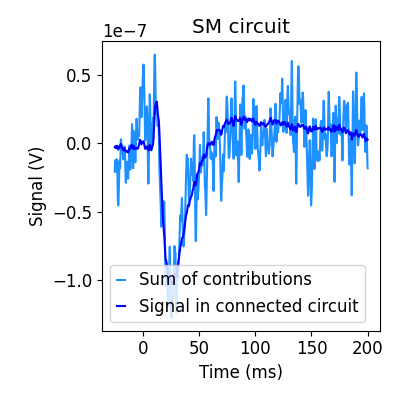

In [100]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L1InhD[0],axis=0)+np.sum(L23InhD[0],axis=0)+np.sum(L4InhD[0],axis=0)+np.sum(L5InhD[0],axis=0)+np.sum(L6InhD[0],axis=0)
inhTotal += np.sum(L23InhD[1],axis=0)+np.sum(L4InhD[1],axis=0)+np.sum(L5InhD[1],axis=0)+np.sum(L6InhD[1],axis=0)

excTotal = np.sum(L23ExcD[0],axis=0)+np.sum(L4ExcD[0],axis=0)+np.sum(L5ExcD[0],axis=0)+np.sum(L6ExcD[0],axis=0)
excTotal += np.sum(L23ExcD[1],axis=0)+np.sum(L4ExcD[1],axis=0)+np.sum(L5ExcD[1],axis=0)+np.sum(L6ExcD[1],axis=0)

# plt.plot(time,inhTotal)
# plt.plot(time,excTotal)
# plt.plot(time,np.sum(contrib_thalR[0],axis=0),'r')
plt.plot(time,np.sum(contrib_thalR[0]+contrib_thalR[1],axis=0)+inhTotal+excTotal,'dodgerblue')
# plt.plot(inhTotal)
# plt.plot(np.sum(L23InhD[0]/10,axis=0))
# plt.plot(np.sum(L4InhD[0]/10,axis=0))
# plt.plot(np.sum(L5InhD[0]/10,axis=0))
# plt.plot(np.sum(L6InhD[0]/10,axis=0))
# plt.plot(excTotal)
# plt.plot(time,np.sum(mean_layer_disconnected[0],axis=0))
# plt.plot(time,np.sum(mean_layer_rewiredD[0],axis=0))
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b')
# plt.plot(np.sum(mean_layer_L6InhD[0],axis=0)/10)
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Sum of contributions','Signal in connected circuit'],handlelength=0.5)
plt.title('SM circuit')
plt.tight_layout()
plt.savefig('../../figures/sumOfContributions_rewired.png',dpi=600)
# plt.plot()

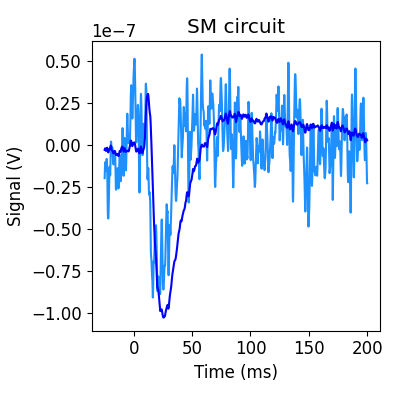

In [113]:
plt.figure(figsize=(4,4))

inhTotal = np.sum(L1InhD[0],axis=0)+np.sum(L23InhD[0],axis=0)+np.sum(L4InhD[0],axis=0)+np.sum(L5InhD[0],axis=0)+np.sum(L6InhD[0],axis=0)
inhTotal += np.sum(L23InhD[1],axis=0)+np.sum(L4InhD[1],axis=0)+np.sum(L5InhD[1],axis=0)+np.sum(L6InhD[1],axis=0)

excTotal = np.sum(L23ExcD[0],axis=0)+np.sum(L4ExcD[0],axis=0)+np.sum(L5ExcD[0],axis=0)+np.sum(L6ExcD[0],axis=0)
excTotal += np.sum(L23ExcD[1],axis=0)+np.sum(L4ExcD[1],axis=0)+np.sum(L5ExcD[1],axis=0)+np.sum(L6ExcD[1],axis=0)

# plt.plot(time,inhTotal)
# plt.plot(time,excTotal)
# plt.plot(time,np.sum(contrib_thalR[0],axis=0),'r')
plt.plot(time,inhTotal+excTotal,'dodgerblue')
# plt.plot(inhTotal)
# plt.plot(np.sum(L23InhD[0]/10,axis=0))
# plt.plot(np.sum(L4InhD[0]/10,axis=0))
# plt.plot(np.sum(L5InhD[0]/10,axis=0))
# plt.plot(np.sum(L6InhD[0]/10,axis=0))
# plt.plot(excTotal)
# plt.plot(time,np.sum(mean_layer_disconnected[0],axis=0))
# plt.plot(time,np.sum(mean_layer_rewiredD[0],axis=0))
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b')
# plt.plot(np.sum(mean_layer_L6InhD[0],axis=0)/10)
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.title('SM circuit')
plt.tight_layout()
# plt.plot()

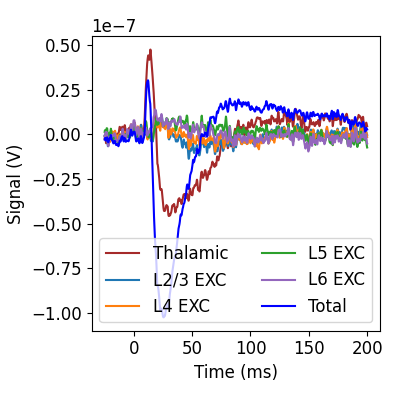

In [122]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution by presnyaptic layer')

plt.plot(time,np.sum(contrib_thalR[0]+contrib_thalR[1],axis=0),'brown')
plt.plot(time,np.sum(L23ExcD[0]+L23ExcD[1],axis=0))
plt.plot(time,np.sum(L4ExcD[0]+L4ExcD[1],axis=0))
plt.plot(time,np.sum(L5ExcD[0]+L5ExcD[1],axis=0))
plt.plot(time,np.sum(L6ExcD[0]+L6ExcD[1],axis=0),'tab:purple')

# plt.plot(np.sum(L23ExcD[0]/10,axis=0)+np.sum(L4ExcD[0]/10,axis=0)+np.sum(L5ExcD[0]/10,axis=0)+np.sum(L6ExcD[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['Thalamic','L2/3 EXC','L4 EXC','L5 EXC','L6 EXC','Total'],ncols=2,loc='lower right')

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalRewired.png',dpi=600)

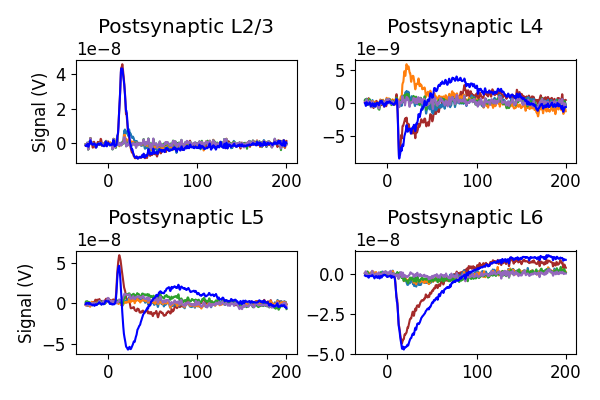

In [123]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('Postsynaptic L2/3')
    else:
        plt.title('Postsynaptic L'+str(layer))

    plt.plot(time,contrib_thalR[0,layer,:]+contrib_thalR[1,layer,:],'brown')
    
    plt.plot(time,L23ExcD[0,layer,:]+L23ExcD[1,layer,:])
    
    plt.plot(time,L4ExcD[0,layer,:]+L4ExcD[1,layer,:])
    plt.plot(time,L5ExcD[0,layer,:]+L5ExcD[1,layer,:])
    plt.plot(time,L6ExcD[0,layer,:]+L6ExcD[1,layer,:],'tab:purple')

    plt.plot(time,mean_layer_rewired[0,layer,:]+mean_layer_rewired[1,layer,:],'b')

    # plt.xlabel('Time (ms)')

    if i % 2 == 0:
        plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalRewiredByLayer.png',dpi=600)

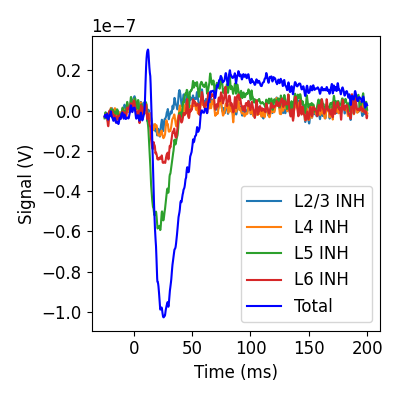

In [124]:
plt.figure(figsize=(4,4))

#plt.title('Cortico-cortical contribution by presnyaptic layer')

# plt.plot(time,np.sum(L1InhD[0]/10,axis=0))
plt.plot(time,np.sum(L23InhD[0]+L23InhD[1],axis=0))
plt.plot(time,np.sum(L4InhD[0]+L4InhD[1],axis=0))
plt.plot(time,np.sum(L5InhD[0]+L5InhD[1],axis=0))
plt.plot(time,np.sum(L6InhD[0]+L6InhD[1],axis=0))

# plt.plot(np.sum(L23InhD[0]/10,axis=0)+np.sum(L4InhD[0]/10,axis=0)+np.sum(L5InhD[0]/10,axis=0)+np.sum(L6InhD[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0),'b')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.legend(['L2/3 INH','L4 INH','L5 INH','L6 INH','Total'])

plt.tight_layout()

plt.savefig('../../figures/CorticoCorticalRewiredInh.png',dpi=600)

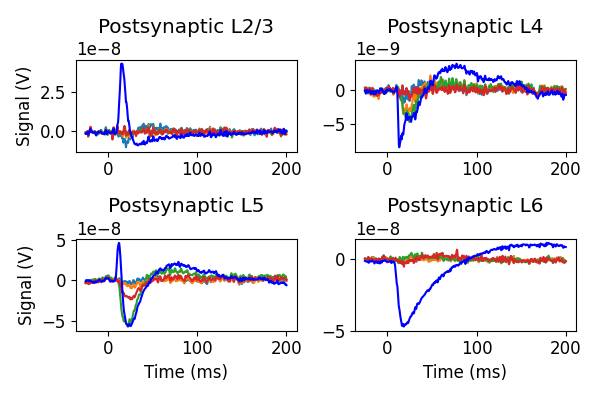

In [125]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('Postsynaptic L2/3')
    else:
        plt.title('Postsynaptic L'+str(layer))
    
    plt.plot(time,L23InhD[0,layer,:]+L23InhD[1,layer,:])
    
    plt.plot(time,L4InhD[0,layer,:]+L4InhD[1,layer,:])
    plt.plot(time,L5InhD[0,layer,:]+L5InhD[1,layer,:])
    plt.plot(time,L6InhD[0,layer,:]+L6InhD[1,layer,:])

    plt.plot(time,mean_layer_rewired[0,layer,:]+mean_layer_rewired[1,layer,:],'b')

    if i > 1:
        plt.xlabel('Time (ms)')
    if i % 2 == 0:
        plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/CorticoCorticalRewiredInhByLayer.png',dpi=600)

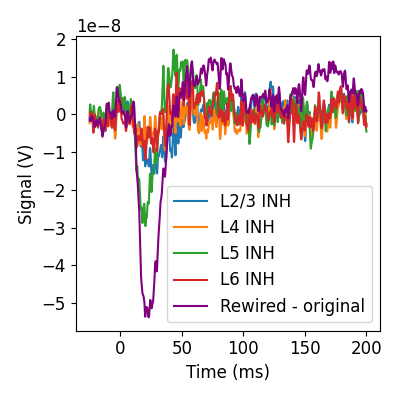

In [301]:
plt.figure(figsize=(4,4))

#plt.title('Difference in Cortico-cortical contribution by presnyaptic layer')

# plt.plot(np.sum(L1InhD[0]/10-L1Inh[0]/10,axis=0))
plt.plot(time,np.sum(L23InhD[0]-L23Inh[0],axis=0))
plt.plot(time,np.sum(L4InhD[0]-L4Inh[0],axis=0))
plt.plot(time,np.sum(L5InhD[0]-L5Inh[0],axis=0))
plt.plot(time,np.sum(L6InhD[0]-L6Inh[0],axis=0))

# plt.plot(time,np.sum(L23InhD[0]/10,axis=0)+np.sum(L4InhD[0]/10,axis=0)+np.sum(L5InhD[0]/10,axis=0)+np.sum(L6InhD[0]/10,axis=0) - np.sum(L23Inh[0]/10,axis=0)-np.sum(L4Inh[0]/10,axis=0)-np.sum(L5Inh[0]/10,axis=0)-np.sum(L6Inh[0]/10,axis=0)+np.sum(L1InhD[0]/10-L1Inh[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)-np.sum(mean_layer_original[0],axis=0),'purple')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()

plt.legend(['L2/3 INH','L4 INH','L5 INH','L6 INH','Rewired - original'])

plt.savefig('../../figures/Difference.png',dpi=600)


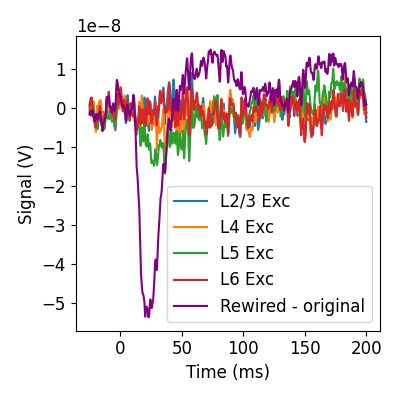

In [302]:
plt.figure(figsize=(4,4))

#plt.title('Difference in Cortico-cortical contribution by presnyaptic layer')

plt.plot(time,np.sum(L23ExcD[0]-L23Exc[0],axis=0))
plt.plot(time,np.sum(L4ExcD[0]-L4Exc[0],axis=0))
plt.plot(time,np.sum(L5ExcD[0]-L5Exc[0],axis=0))
plt.plot(time,np.sum(L6ExcD[0]-L6Exc[0],axis=0))

# plt.plot(np.sum(L23ExcD[0]/10,axis=0)+np.sum(L4ExcD[0]/10,axis=0)+np.sum(L5ExcD[0]/10,axis=0)+np.sum(L6ExcD[0]/10,axis=0) - np.sum(L23Exc[0]/10,axis=0)-np.sum(L4Exc[0]/10,axis=0)-np.sum(L5Exc[0]/10,axis=0)-np.sum(L6Exc[0]/10,axis=0),'k:')

plt.plot(time,np.sum(mean_layer_rewired[0],axis=0)-np.sum(mean_layer_original[0],axis=0),'purple')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')

plt.tight_layout()

plt.legend(['L2/3 Exc','L4 Exc','L5 Exc','L6 Exc','Rewired - original'])
plt.savefig('../../figures/DifferenceExc.png',dpi=600)

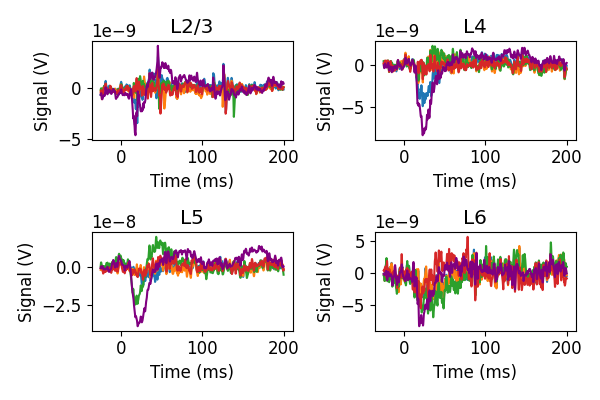

In [303]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))
    
    plt.plot(time,L23InhD[0,layer,:]-L23Inh[0,layer,:])
    
    plt.plot(time,L4InhD[0,layer,:]-L4Inh[0,layer,:])
    plt.plot(time,L5InhD[0,layer,:]-L5Inh[0,layer,:])
    plt.plot(time,L6InhD[0,layer,:]-L6Inh[0,layer,:])

    plt.plot(time,mean_layer_rewired[0,layer,:]-mean_layer_original[0,layer,:],'purple')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/DifferenceByLayer.png',dpi=600)

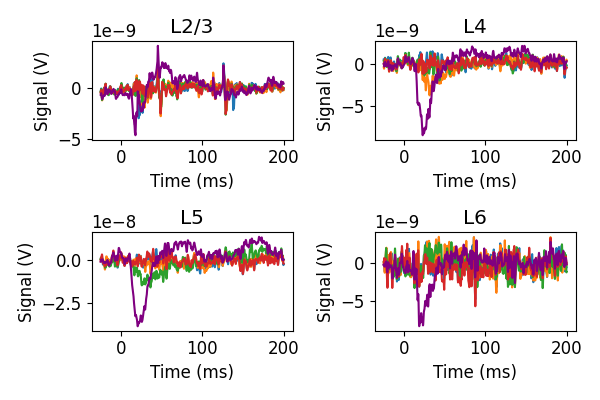

In [304]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))
    
    plt.plot(time,L23ExcD[0,layer,:]-L23Exc[0,layer,:])
    
    plt.plot(time,L4ExcD[0,layer,:]-L4Exc[0,layer,:])
    plt.plot(time,L5ExcD[0,layer,:]-L5Exc[0,layer,:])
    plt.plot(time,L6ExcD[0,layer,:]-L6Exc[0,layer,:])

    plt.plot(time,mean_layer_rewired[0,layer,:]-mean_layer_original[0,layer,:],'purple')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/DifferenceByLayerExc.png',dpi=600)

In [345]:
forig

6.5028901734103925

In [121]:
forig = (FWHM(np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0))-FWHM(np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0)))

f23 = (FWHM(np.sum(mean_layer_L23Exc[0],axis=0))-FWHM(np.sum(mean_layer_L23ExcD[0],axis=0)))
f4 = (FWHM(np.sum(mean_layer_L4Exc[0],axis=0))-FWHM(np.sum(mean_layer_L4ExcD[0],axis=0)))
f5 = (FWHM(np.sum(mean_layer_L5Exc[0],axis=0))-FWHM(np.sum(mean_layer_L5ExcD[0],axis=0)))
f6 = (FWHM(np.sum(mean_layer_L6Exc[0],axis=0))-FWHM(np.sum(mean_layer_L6ExcD[0],axis=0)))

f23inh = (FWHM(np.sum(mean_layer_L23Inh[0],axis=0))-FWHM(np.sum(mean_layer_L23InhD[0],axis=0)))
f4inh = (FWHM(np.sum(mean_layer_L4[0],axis=0))-FWHM(np.sum(mean_layer_L4InhD[0],axis=0)))
f5inh = (FWHM(np.sum(mean_layer_L5[0],axis=0))-FWHM(np.sum(mean_layer_L5InhD[0],axis=0)))
f6inh = (FWHM(np.sum(mean_layer_L6[0],axis=0))-FWHM(np.sum(mean_layer_L6InhD[0],axis=0)))

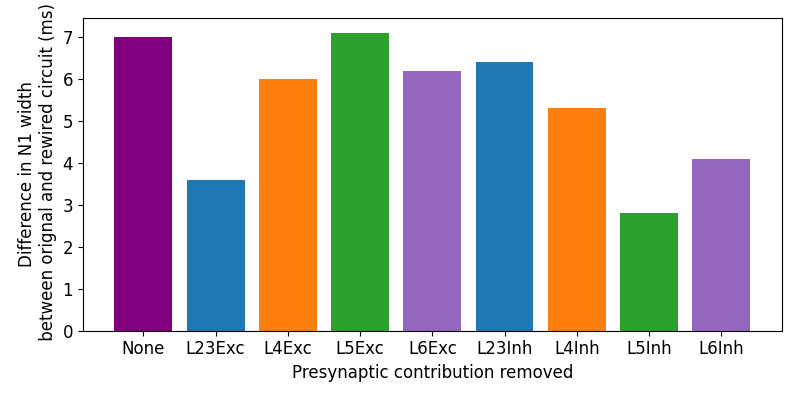

In [322]:
plt.figure(figsize=(8,4))

colorlist = ['purple','C0','C1','C2','C4','C0','C1','C2','C4']

plt.bar(['None','L23Exc','L4Exc','L5Exc','L6Exc','L23Inh','L4Inh','L5Inh','L6Inh'], [forig, f23, f4, f5, f6, f23inh, f4inh, f5inh, f6inh],color=colorlist)

# Add title and labels
plt.ylabel('Difference in N1 width\n between orignal and rewired circuit (ms)')
plt.xlabel('Presynaptic contribution removed')
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig('../../figures/fwhm.png',dpi=600)

In [323]:
FWHM(np.sum(mean_layer_L6[0],axis=0)+np.sum(L6Inh[0],axis=0))

28.41262783459316

In [324]:
FWHM(np.sum(mean_layer_L6[0],axis=0)+np.sum(L6Inh[0,[2,4,6]],axis=0))

27.012005335704764

In [325]:
FWHM(np.sum(mean_layer_L6[0],axis=0)+np.sum(L6Inh[0,[2,4,5]],axis=0))

28.812805691418404

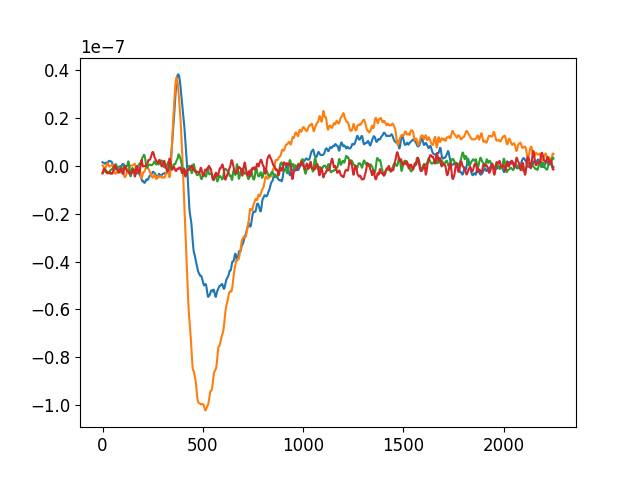

In [360]:
plt.figure()
plt.plot(np.sum(D_CHC[0],axis=0))
plt.plot(np.sum(rewired_CHC[0],axis=0))
plt.plot(np.sum(contrib_CHC[0],axis=0))
plt.plot(np.sum(contrib_rewired_CHC[0],axis=0))

In [358]:
(forig - (FWHM(np.sum(D_CHC[0],axis=0))-FWHM(np.sum(rewired_CHC[0],axis=0))))/forig

0.24615384615384536

In [343]:
FWHM(contrib_LBC[0,5])

18.008003557136504

In [131]:
(np.sum(mean_layer_L23Inh[0:2], axis=0) + np.sum(L23Inh[0:2, [2,4,6]], axis=(0, 1))).shape 

(7, 2250)

In [128]:
l2minus5 = FWHM(np.sum(mean_layer_L23Inh[0:2], axis=(0, 1)) + np.sum(L23Inh[0:2, [2,4,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L23InhD[0:2], axis=(0, 1)) + np.sum(L23InhD[0:2, [2,4,6]], axis=(0, 1))))

l2minus6 = FWHM(np.sum(mean_layer_L23Inh[0:2], axis=(0, 1)) + np.sum(L23Inh[0:2, [2,4,5]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L23InhD[0:2], axis=(0, 1)) + np.sum(L23InhD[0:2, [2,4,5]], axis=(0, 1))))

l2minus2 = FWHM(np.sum(mean_layer_L23Inh[0:2], axis=(0, 1)) + np.sum(L23Inh[0:2, [4,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L23InhD[0:2], axis=(0, 1)) + np.sum(L23InhD[0:2, [4,5,6]], axis=(0, 1))))

l2minus4 = FWHM(np.sum(mean_layer_L23Inh[0:2], axis=(0, 1)) + np.sum(L23Inh[0:2, [2,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L23InhD[0:2], axis=(0, 1)) + np.sum(L23InhD[0:2, [2,5,6]], axis=(0, 1))))

l4minus5 = FWHM(np.sum(mean_layer_L4[0:2], axis=(0, 1)) + np.sum(L4Inh[0:2, [2,4,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L4InhD[0:2], axis=(0, 1)) + np.sum(L4InhD[0:2, [2,4,6]], axis=(0, 1))))

l4minus6 = FWHM(np.sum(mean_layer_L4[0:2], axis=(0, 1)) + np.sum(L4Inh[0:2, [2,4,5]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L4InhD[0:2], axis=(0, 1)) + np.sum(L4InhD[0:2, [2,4,5]], axis=(0, 1))))

l4minus2 = FWHM(np.sum(mean_layer_L4[0:2], axis=(0, 1)) + np.sum(L4Inh[0:2, [4,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L4InhD[0:2], axis=(0, 1)) + np.sum(L4InhD[0:2, [4,5,6]], axis=(0, 1))))

l4minus4 = FWHM(np.sum(mean_layer_L4[0:2], axis=(0, 1)) + np.sum(L4Inh[0:2, [2,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L4InhD[0:2], axis=(0, 1)) + np.sum(L4InhD[0:2, [2,5,6]], axis=(0, 1))))

l5minus2 = FWHM(np.sum(mean_layer_L5[0:2], axis=(0, 1)) + np.sum(L5Inh[0:2, [4,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L5InhD[0:2], axis=(0, 1)) + np.sum(L5InhD[0:2, [4,5,6]], axis=(0, 1))))

l5minus4 = FWHM(np.sum(mean_layer_L5[0:2], axis=(0, 1)) + np.sum(L5Inh[0:2, [2,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L5InhD[0:2], axis=(0, 1)) + np.sum(L5InhD[0:2, [2,5,6]], axis=(0, 1))))

l5minus5 = FWHM(np.sum(mean_layer_L5[0:2], axis=(0, 1)) + np.sum(L5Inh[0:2, [2,4,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L5InhD[0:2], axis=(0, 1)) + np.sum(L5InhD[0:2, [2,4,6]], axis=(0, 1))))

l5minus6 = FWHM(np.sum(mean_layer_L5[0:2], axis=(0, 1)) + np.sum(L5Inh[0:2, [2,4,5]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L5InhD[0:2], axis=(0, 1)) + np.sum(L5InhD[0:2, [2,4,5]], axis=(0, 1))))

l6minus5 = FWHM(np.sum(mean_layer_L6[0:2], axis=(0, 1)) + np.sum(L6Inh[0:2, [2,4,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L6InhD[0:2], axis=(0, 1)) + np.sum(L6InhD[0:2, [2,4,6]], axis=(0, 1))))

l6minus6 = FWHM(np.sum(mean_layer_L6[0:2], axis=(0, 1)) + np.sum(L6Inh[0:2, [2,4,5]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L6InhD[0:2], axis=(0, 1)) + np.sum(L6InhD[0:2, [2,4,5]], axis=(0, 1))))

l6minus2 = FWHM(np.sum(mean_layer_L6[0:2], axis=(0, 1)) + np.sum(L6Inh[0:2, [4,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L6InhD[0:2], axis=(0, 1)) + np.sum(L6InhD[0:2, [4,5,6]], axis=(0, 1))))

l6minus4 = FWHM(np.sum(mean_layer_L6[0:2], axis=(0, 1)) + np.sum(L6Inh[0:2, [2,5,6]], axis=(0, 1))) - \
           (FWHM(np.sum(mean_layer_L6InhD[0:2], axis=(0, 1)) + np.sum(L6InhD[0:2, [2,5,6]], axis=(0, 1))))

inhibitoryf = np.array([[l2minus2, l2minus4,l2minus5,l2minus6],[l4minus2, l4minus4,l4minus5,l4minus6],[l5minus2, l5minus4,l5minus5,l5minus6],[l6minus2, l6minus4,l6minus5,l6minus6]])

In [129]:
tminus5 = FWHM(np.sum(mean_layer_disconnected_noThal[0:2], axis=(0, 1)) + np.sum(contrib_thal[0:2, [2,4,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_disconnected_noThalR[0:2], axis=(0, 1)) + np.sum(contrib_thalR[0:2, [2,4,6]], axis=(0, 1))))

tminus6 = FWHM(np.sum(mean_layer_disconnected_noThal[0:2], axis=(0, 1)) + np.sum(contrib_thal[0:2, [2,4,5]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_disconnected_noThalR[0:2], axis=(0, 1)) + np.sum(contrib_thalR[0:2, [2,4,5]], axis=(0, 1))))

tminus2 = FWHM(np.sum(mean_layer_disconnected_noThal[0:2], axis=(0, 1)) + np.sum(contrib_thal[0:2, [4,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_disconnected_noThalR[0:2], axis=(0, 1)) + np.sum(contrib_thalR[0:2, [4,5,6]], axis=(0, 1))))

tminus4 = FWHM(np.sum(mean_layer_disconnected_noThal[0:2], axis=(0, 1)) + np.sum(contrib_thal[0:2, [2,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_disconnected_noThalR[0:2], axis=(0, 1)) + np.sum(contrib_thalR[0:2, [2,5,6]], axis=(0, 1))))

tminus5 = FWHM(np.sum(mean_layer_disconnected_noThal[0:2], axis=(0, 1)) + np.sum(contrib_thal[0:2, [2,4,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_disconnected_noThalR[0:2], axis=(0, 1)) + np.sum(contrib_thalR[0:2, [2,4,6]], axis=(0, 1))))


l2minus5 = FWHM(np.sum(mean_layer_L23Exc[0:2], axis=(0, 1)) + np.sum(L23Exc[0:2, [2,4,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L23ExcD[0:2], axis=(0, 1)) + np.sum(L23ExcD[0:2, [2,4,6]], axis=(0, 1))))

l2minus6 = FWHM(np.sum(mean_layer_L23Exc[0:2], axis=(0, 1)) + np.sum(L23Exc[0:2, [2,4,5]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L23ExcD[0:2], axis=(0, 1)) + np.sum(L23ExcD[0:2, [2,4,5]], axis=(0, 1))))

l2minus2 = FWHM(np.sum(mean_layer_L23Exc[0:2], axis=(0, 1)) + np.sum(L23Exc[0:2, [4,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L23ExcD[0:2], axis=(0, 1)) + np.sum(L23ExcD[0:2, [4,5,6]], axis=(0, 1))))

l2minus4 = FWHM(np.sum(mean_layer_L23Exc[0:2], axis=(0, 1)) + np.sum(L23Exc[0:2, [2,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L23ExcD[0:2], axis=(0, 1)) + np.sum(L23ExcD[0:2, [2,5,6]], axis=(0, 1))))

l4minus5 = FWHM(np.sum(mean_layer_L4Exc[0:2], axis=(0, 1)) + np.sum(L4Exc[0:2, [2,4,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L4ExcD[0:2], axis=(0, 1)) + np.sum(L4ExcD[0:2, [2,4,6]], axis=(0, 1))))

l4minus6 = FWHM(np.sum(mean_layer_L4Exc[0:2], axis=(0, 1)) + np.sum(L4Exc[0:2, [2,4,5]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L4ExcD[0:2], axis=(0, 1)) + np.sum(L4ExcD[0:2, [2,4,5]], axis=(0, 1))))

l4minus2 = FWHM(np.sum(mean_layer_L4Exc[0:2], axis=(0, 1)) + np.sum(L4Exc[0:2, [4,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L4ExcD[0:2], axis=(0, 1)) + np.sum(L4ExcD[0:2, [4,5,6]], axis=(0, 1))))

l4minus4 = FWHM(np.sum(mean_layer_L4Exc[0:2], axis=(0, 1)) + np.sum(L4Exc[0:2, [2,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L4ExcD[0:2], axis=(0, 1)) + np.sum(L4ExcD[0:2, [2,5,6]], axis=(0, 1))))

l5minus2 = FWHM(np.sum(mean_layer_L5Exc[0:2], axis=(0, 1)) + np.sum(L5Exc[0:2, [4,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L5ExcD[0:2], axis=(0, 1)) + np.sum(L5ExcD[0:2, [4,5,6]], axis=(0, 1))))

l5minus4 = FWHM(np.sum(mean_layer_L5Exc[0:2], axis=(0, 1)) + np.sum(L5Exc[0:2, [2,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L5ExcD[0:2], axis=(0, 1)) + np.sum(L5ExcD[0:2, [2,5,6]], axis=(0, 1))))

l5minus5 = FWHM(np.sum(mean_layer_L5Exc[0:2], axis=(0, 1)) + np.sum(L5Exc[0:2, [2,4,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L5ExcD[0:2], axis=(0, 1)) + np.sum(L5ExcD[0:2, [2,4,6]], axis=(0, 1))))

l5minus6 = FWHM(np.sum(mean_layer_L5Exc[0:2], axis=(0, 1)) + np.sum(L5Exc[0:2, [2,4,5]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L5ExcD[0:2], axis=(0, 1)) + np.sum(L5ExcD[0:2, [2,4,5]], axis=(0, 1))))

l6minus5 = FWHM(np.sum(mean_layer_L6Exc[0:2], axis=(0, 1)) + np.sum(L6Exc[0:2, [2,4,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L6ExcD[0:2], axis=(0, 1)) + np.sum(L6ExcD[0:2, [2,4,6]], axis=(0, 1))))

l6minus6 = FWHM(np.sum(mean_layer_L6Exc[0:2], axis=(0, 1)) + np.sum(L6Exc[0:2, [2,4,5]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L6ExcD[0:2], axis=(0, 1)) + np.sum(L6ExcD[0:2, [2,4,5]], axis=(0, 1))))

l6minus2 = FWHM(np.sum(mean_layer_L6Exc[0:2], axis=(0, 1)) + np.sum(L6Exc[0:2, [4,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L6ExcD[0:2], axis=(0, 1)) + np.sum(L6ExcD[0:2, [4,5,6]], axis=(0, 1))))

l6minus4 = FWHM(np.sum(mean_layer_L6Exc[0:2], axis=(0, 1)) + np.sum(L6Exc[0:2, [2,5,6]], axis=(0, 1))) - \
          (FWHM(np.sum(mean_layer_L6ExcD[0:2], axis=(0, 1)) + np.sum(L6ExcD[0:2, [2,5,6]], axis=(0, 1))))

excitatoryf = np.array([[tminus2, tminus4,tminus5,tminus6],[l2minus2, l2minus4,l2minus5,l2minus6],[l4minus2, l4minus4,l4minus5,l4minus6],[l5minus2, l5minus4,l5minus5,l5minus6],[l6minus2, l6minus4,l6minus5,l6minus6]])


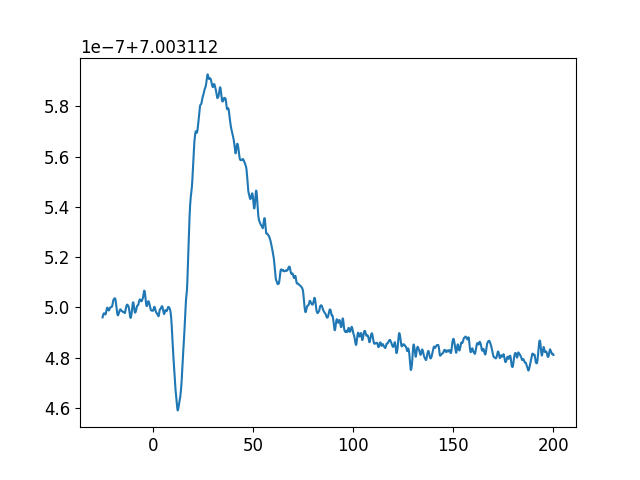

In [330]:
plt.figure()
plt.plot(time,forig-np.sum(mean_layer_L5Exc[0],axis=0)+np.sum(L5Exc[0,[4,5,6]],axis=0))

In [130]:
(forig-inhibitoryf)/forig

array([[ 0.12307692,  0.04615385,  0.13846154, -0.04615385],
       [ 0.07692308, -0.09230769,  0.16923077, -0.01538462],
       [ 0.        , -0.03076923,  1.07692308, -0.16923077],
       [ 0.01538462,  0.07692308,  0.23076923, -0.03076923]])

In [143]:
(forig-excitatoryf)/forig

array([[-4.76923077e-01, -3.07692308e-02,  1.53846154e-02,
         7.69230769e-02],
       [ 1.53846154e-01,  4.61538462e-02,  2.30769231e-01,
        -9.23076923e-02],
       [-2.18531366e-15, -3.07692308e-02,  7.69230769e-02,
         2.00000000e-01],
       [ 1.53846154e-02, -2.18531366e-15, -4.15384615e-01,
         1.23076923e-01],
       [ 1.53846154e-02,  3.07692308e-02,  1.07692308e-01,
        -1.07692308e-01]])

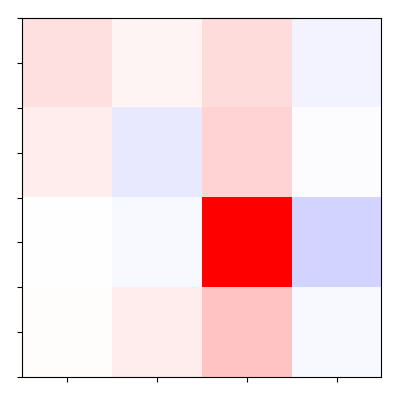

In [136]:
plt.figure(figsize=(4,4))
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow((forig-inhibitoryf)/forig,vmin=-1,vmax=1,cmap='bwr')
plt.tight_layout()

plt.savefig('../../figures/fwhminh.png',dpi=600)

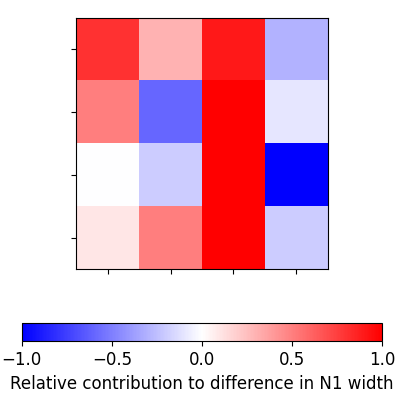

In [137]:

plt.figure(figsize=(4,4))
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(forig-inhibitoryf,vmin=-1,vmax=1,cmap='bwr')
plt.tight_layout()

plt.colorbar(label = 'Relative contribution to difference in N1 width', location='bottom')

plt.savefig('../../figures/fwhmcolorbar.png',dpi=600)


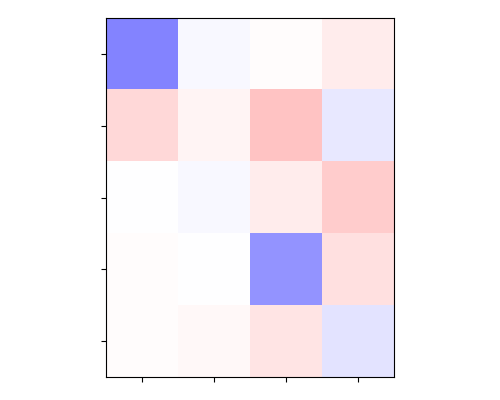

In [138]:
plt.figure(figsize=(5,4))
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow((forig-excitatoryf)/forig,vmin=-1,vmax=1,cmap='bwr')
plt.tight_layout()
plt.savefig('../../figures/fwhmexc.png',dpi=600)

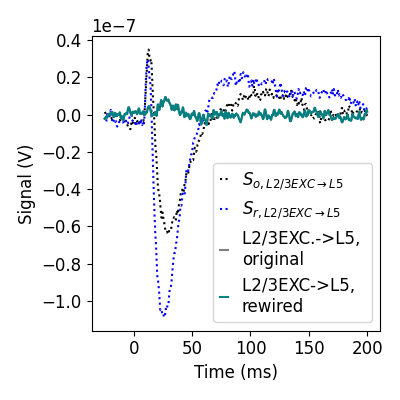

In [145]:
plt.figure(figsize=(4,4))

plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0)-(L23Exc[0,5]+L23Exc[1,5]),':k')
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0)-(L23ExcD[0,5]+L23ExcD[1,5]),':b')
plt.plot(time,(L23Exc[0,5]+L23Exc[1,5]),'grey')
plt.plot(time,(L23Exc[0,5]+L23Exc[1,5]),'teal')

# plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend([r'$S_{o,L2/3EXC \rightarrow L5}$',r'$S_{r,L2/3EXC \rightarrow L5}$','L2/3EXC.->L5, \noriginal','L2/3EXC->L5, \nrewired'],loc='lower right',handlelength=0.5)
plt.tight_layout()
plt.savefig('../../figures/fwhml23signal.png',dpi=600)

In [84]:
FWHM(np.sum(mean_layer_original[0],axis=0)-contrib_thal[0,6])

24.811027123165857

In [85]:
FWHM(np.sum(mean_layer_rewired[0],axis=0)-contrib_thalR[0,6])

21.009337483325922

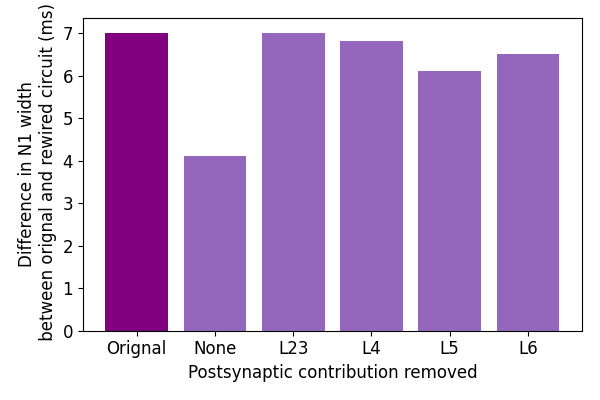

In [335]:
plt.figure(figsize=(6,4))



plt.bar(['Orignal','None','L23','L4','L5','L6'], [forig, f6inh, l6minus2, l6minus4,l6minus5,l6minus6], color=['Purple','C4','C4','C4','C4','C4'])

# Add title and labels
plt.ylabel('Difference in N1 width\n between orignal and rewired circuit (ms)')
plt.xlabel('Postsynaptic contribution removed')
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig('../../figures/fwhm_l6.png',dpi=600)

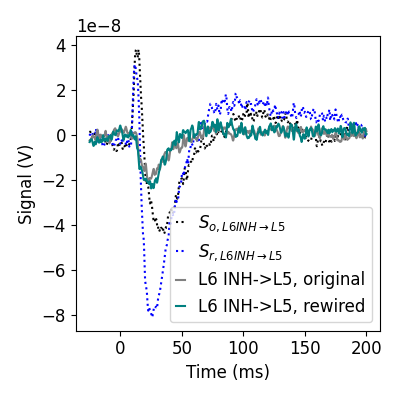

In [146]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0)-(L6Inh[0,5]+L6Inh[1,5]),':k')
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0)-(L6InhD[0,5]+L6Inh[1,5]),':b')
plt.plot(time,L6Inh[0,5]+L6Inh[1,5],'grey')
plt.plot(time,L6InhD[0,5]+L6InhD[1,5],'teal')

# plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend([r'$S_{o,L6 INH \rightarrow L5}$',r'$S_{r,L6 INH \rightarrow L5}$','L6 INH->L5, original','L6 INH->L5, rewired'],loc='lower right',handlelength=0.5)
plt.tight_layout()
plt.savefig('../../figures/fwhml6signal.png',dpi=600)

In [343]:
FWHM(np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,4,6]],axis=0))

30.213428190306807

In [327]:
FWHM(np.sum(mean_layer_original[0],axis=0))

32.21431747443309

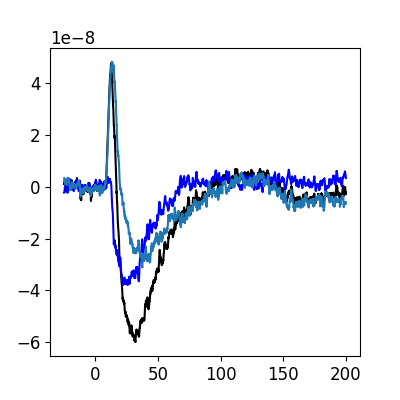

In [335]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,L5Inh[0,5],'b')
plt.plot(time,np.sum(mean_layer_L5[0],axis=0)+np.sum(L5Inh[0,[2,4,6]],axis=0))
# plt.plot(time,np.sum(mean_layer_L6InhD[0],axis=0)+np.sum(L6InhD[0,[2,4,5]],axis=0))

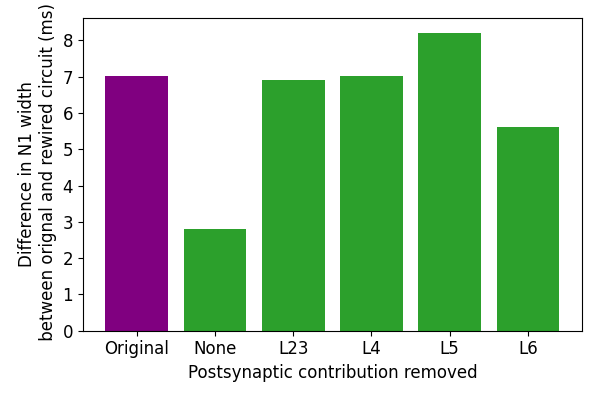

In [337]:
plt.figure(figsize=(6,4))

plt.bar(['Original','None','L23','L4','L5','L6'], [forig, f5inh, l5minus2, l5minus4,l5minus5,l5minus6], color=['Purple','C2','C2','C2','C2','C2'])

# Add title and labels
plt.ylabel('Difference in N1 width\n between orignal and rewired circuit (ms)')
plt.xlabel('Postsynaptic contribution removed')
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig('../../figures/fwhm_l5.png',dpi=600)

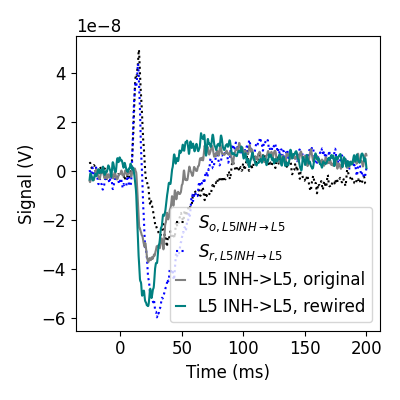

In [147]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0]+mean_layer_original[1],axis=0)-(L5Inh[0,5]+L5Inh[1,5]),':k')
plt.plot(time,np.sum(mean_layer_rewired[0]+mean_layer_rewired[1],axis=0)-(L5InhD[0,5]+L5InhD[1,5]),':b')
plt.plot(time,L5Inh[0,5]+L5Inh[1,5],'grey')
plt.plot(time,L5InhD[0,5]+L5InhD[1,5],'teal')

# plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend([r'$S_{o,L5 INH\rightarrow L5}$',r'$S_{r,L5 INH \rightarrow L5}$','L5 INH->L5, original','L5 INH->L5, rewired'],loc='lower right',handlelength=0.5)
plt.tight_layout()
plt.savefig('../../figures/fwhml5signal.png',dpi=600)

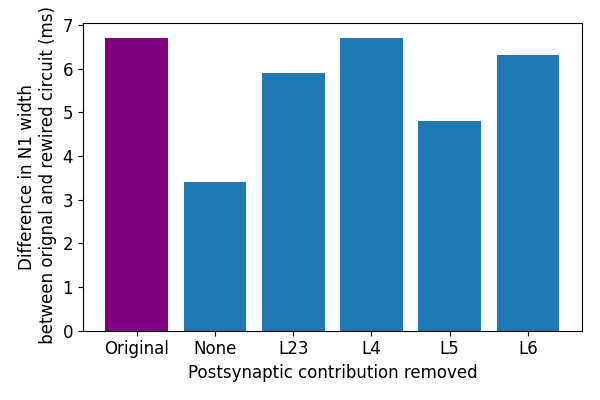

In [341]:
plt.figure(figsize=(6,4))

plt.bar(['Original','None','L23','L4','L5','L6'], [forig,f23, l2minus2, l2minus4,l2minus5,l2minus6], color=['Purple','C0','C0','C0','C0','C0'])

# Add title and labels
plt.ylabel('Difference in N1 width\n between orignal and rewired circuit (ms)')
plt.xlabel('Postsynaptic contribution removed')
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig('../../figures/fwhm_l2.png',dpi=600)

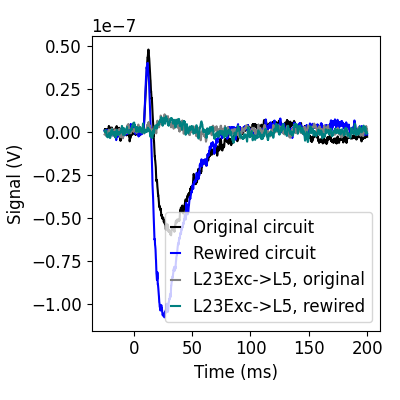

In [342]:
plt.figure(figsize=(4,4))
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
plt.plot(time,L23Exc[0,5],'grey')
plt.plot(time,L23ExcD[0,5],'teal')
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Original circuit','Rewired circuit','L23Exc->L5, original','L23Exc->L5, rewired'],loc='lower right',handlelength=0.5)
plt.tight_layout()
plt.savefig('../../figures/fwhml2signal.png',dpi=600)

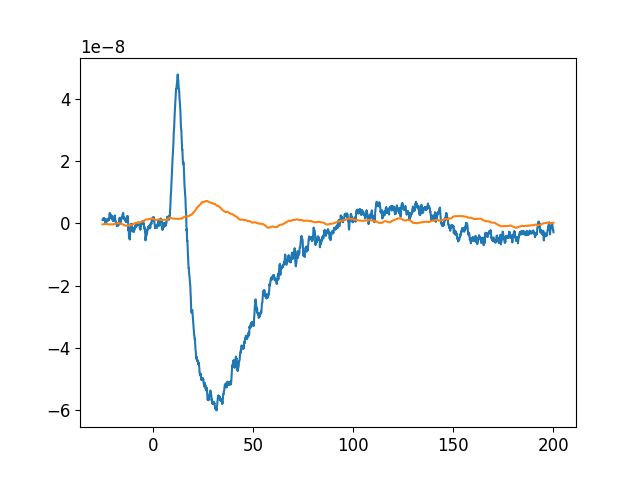

In [347]:
plt.figure()
# plt.plot(time,L23Exc[0,2])
# plt.plot(time,L23Exc[0,4])
plt.plot(time,np.sum(mean_layer_original[0],axis=0))

plt.plot(time,np.convolve(np.ones(100),L23Exc[0,5]/100,mode='same'))
# plt.plot(time,np.convolve(np.ones(100),L23ExcD[0,5],mode='same'))
# plt.plot(time,L23Exc[0,6])
# plt.plot(time,np.sum(L23Exc[0],axis=0),'k')

In [419]:
FWHM(np.sum(mean_layer_disconnected_noThal[0],axis=0)+np.sum(contrib_thal[0,[2,4,5]],axis=0))

24.811027123165857

In [420]:
FWHM(np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,4,5]],axis=0))

30.513561582925746

In [421]:
FWHM(np.sum(mean_layer_L23ExcD[0],axis=0)+np.sum(L23ExcD[0,[2,4,5]],axis=0))

24.210760337927972

In [422]:
FWHM(np.sum(mean_layer_original[0],axis=0))

32.21431747443309

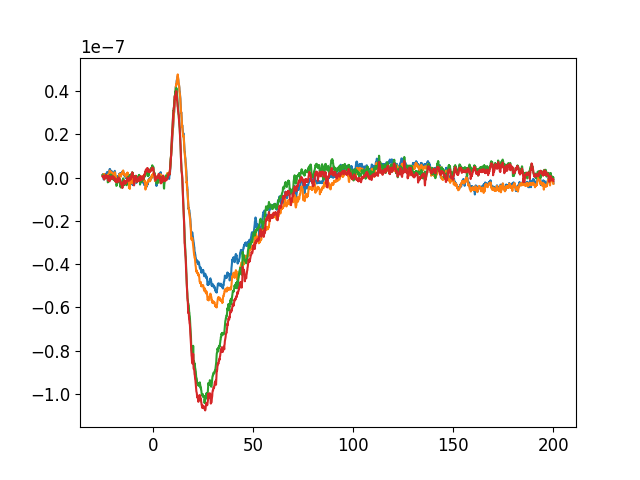

In [368]:
plt.figure()
# plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,5,6]],axis=0))
plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,4,5]],axis=0))
plt.plot(time,np.sum(mean_layer_original[0],axis=0))

plt.plot(time,np.sum(mean_layer_L23ExcD[0],axis=0)+np.sum(L23ExcD[0,[2,4,5]],axis=0))
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0))
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0))

# plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0))
# plt.plot(time,np.sum(mean_layer_L23ExcD[0],axis=0))


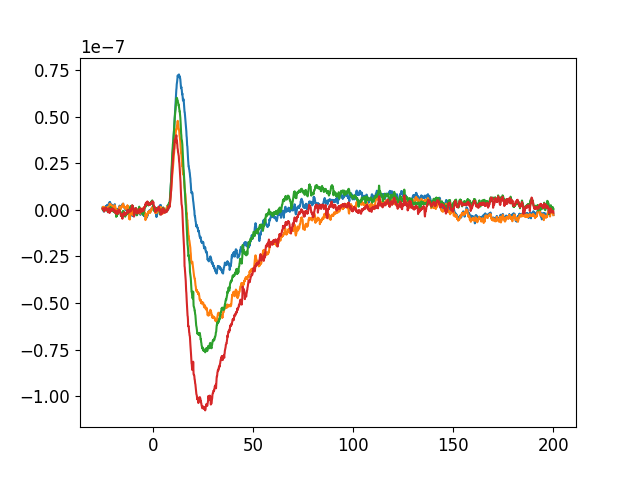

In [417]:
plt.figure()
# plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,5,6]],axis=0))
plt.plot(time,np.sum(mean_layer_disconnected_noThal[0],axis=0)+np.sum(contrib_thal[0,[2,4,5]],axis=0))
plt.plot(time,np.sum(mean_layer_original[0],axis=0))

plt.plot(time,np.sum(mean_layer_disconnected_noThalR[0],axis=0)+np.sum(contrib_thalR[0,[2,4,5]],axis=0))
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0))
# plt.plot(time,np.sum(mean_layer_rewired[0],axis=0))

# plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0))
# plt.plot(time,np.sum(mean_layer_L23ExcD[0],axis=0))

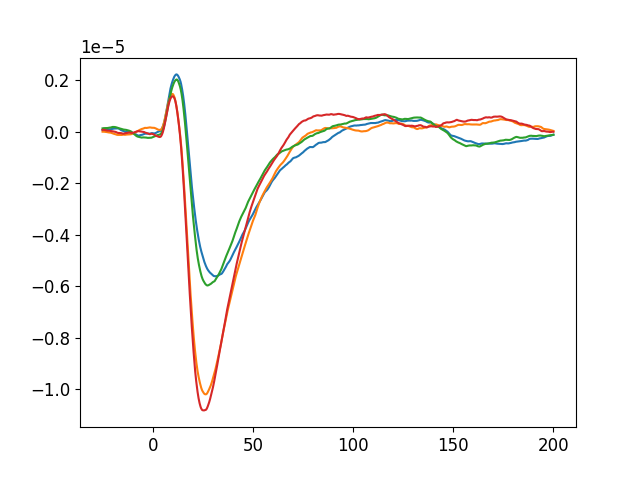

In [263]:
plt.figure()

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_original[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_rewired[0],axis=0),mode='same'))

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0),mode='same'))

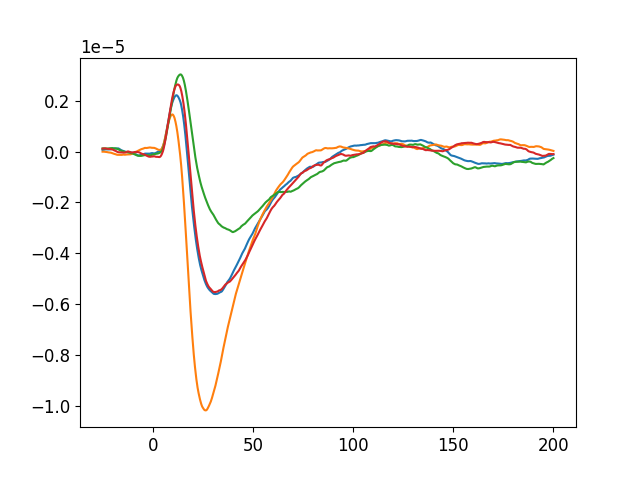

In [285]:
plt.figure()

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_original[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_rewired[0],axis=0),mode='same'))

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L5[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L5InhD[0],axis=0),mode='same'))

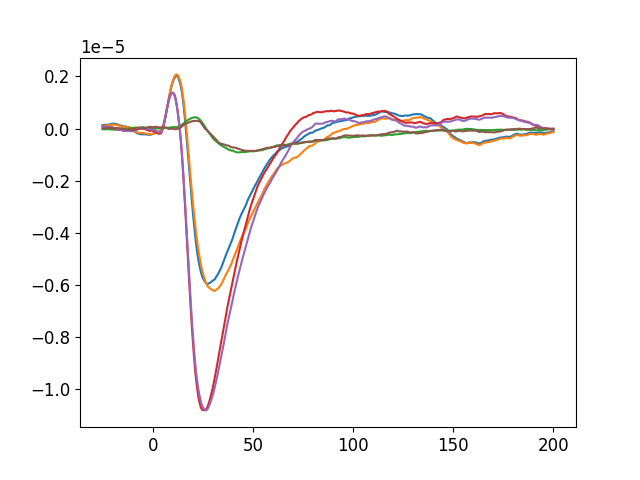

In [280]:
plt.figure()

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,4,6]],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(L23Exc[0,[2,4,6]],axis=0),mode='same'))

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0)+np.sum(L23ExcD[0,[2,4,6]],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(L23ExcD[0,[2,4,6]],axis=0),mode='same'))

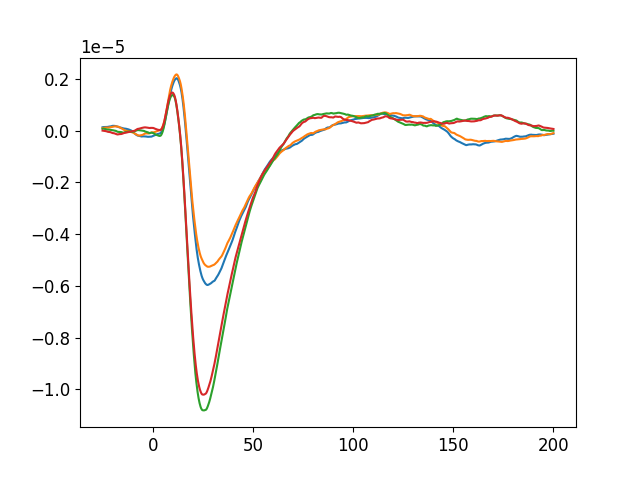

In [284]:
plt.figure()

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0)+L23Exc[0,5],mode='same'))

plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0),mode='same'))
plt.plot(time,np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0)+L23ExcD[0,5],mode='same'))


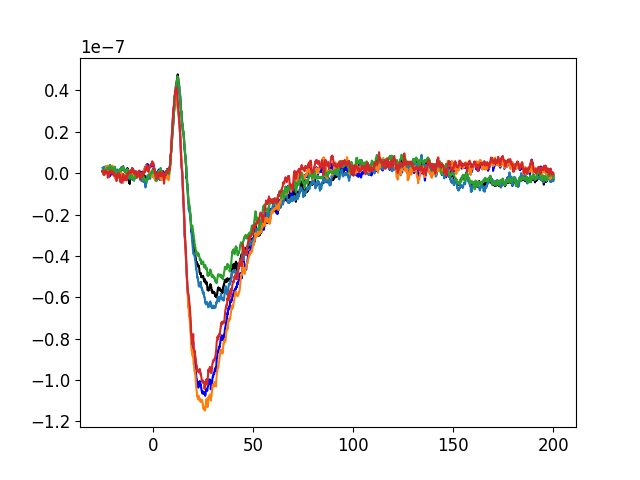

In [180]:
plt.figure()
plt.plot(time,np.sum(mean_layer_original[0],axis=0),'k')
plt.plot(time,np.sum(mean_layer_rewired[0],axis=0),'b')
plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,4,6]],axis=0))
plt.plot(time,np.sum(mean_layer_L23ExcD[0],axis=0)+np.sum(L23ExcD[0,[2,4,6]],axis=0))

plt.plot(time,np.sum(mean_layer_L23Exc[0],axis=0)+np.sum(L23Exc[0,[2,4,5]],axis=0))
plt.plot(time,np.sum(mean_layer_L23ExcD[0],axis=0)+np.sum(L23ExcD[0,[2,4,5]],axis=0))


In [154]:
for l in layer:
   print(FWHM(np.sum(mean_layer_L6[0],axis=0))-FWHM(np.sum(mean_layer_L6InhD[0],axis=0)))

TypeError: 'int' object is not iterable

In [ ]:
plt.figure()

# plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0),mode='same'))
# plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0),mode='same'))

plt.plot(np.convolve(np.ones(100),L23Exc[0,5],mode='same'),'b')
plt.plot(np.convolve(np.ones(100),L23ExcD[0,5],mode='same'),'r')

# plt.plot(np.convolve(np.ones(100),np.sum(L5Exc[0],axis=0),mode='same'),'b')
# plt.plot(np.convolve(np.ones(100),np.sum(L5ExcD[0],axis=0),mode='same'),'r')


In [ ]:
plt.figure()
for i, l in enumerate([2,4,5,6]):
    plt.subplot(2,2,i+1)
    plt.title(l)
    plt.plot(np.convolve(np.ones(100),L23Exc[0,l],mode='same'))
    plt.plot(np.convolve(np.ones(100),L23ExcD[0,l],mode='same'))

    plt.plot(np.convolve(np.ones(100),np.sum(L23Exc[0],axis=0),mode='same'),'b')
    plt.plot(np.convolve(np.ones(100),np.sum(L23ExcD[0],axis=0),mode='same'),'r')
plt.tight_layout()

In [ ]:
plt.figure()
for i, l in enumerate([2,4,5,6]):
    plt.subplot(2,2,i+1)
    plt.title(l)
    plt.plot(np.convolve(np.ones(100),L6Inh[0,l],mode='same'))
    plt.plot(np.convolve(np.ones(100),L6InhD[0,l],mode='same'))

    plt.plot(np.convolve(np.ones(100),np.sum(L6Inh[0],axis=0),mode='same'),'b')
    plt.plot(np.convolve(np.ones(100),np.sum(L6InhD[0],axis=0),mode='same'),'r')
plt.tight_layout()

In [ ]:
plt.figure()
for i, l in enumerate([2,4,5,6]):
    plt.subplot(2,2,i+1)
    plt.title(l)

    plt.plot(np.convolve(np.ones(100),L6Inh[0,l]-L6InhD[0,l],mode='same'),'b')
plt.tight_layout()

In [ ]:
plt.figure()

plt.subplot(3,1,1)
plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L23Exc[0],axis=0),mode='same'))
plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L23ExcD[0],axis=0),mode='same'))

plt.plot(np.convolve(np.ones(100),np.sum(L23Exc[0],axis=0),mode='same'),'b')
plt.plot(np.convolve(np.ones(100),np.sum(L23ExcD[0],axis=0),mode='same'),'r')

plt.subplot(3,1,2)
plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L5[0],axis=0),mode='same'))
plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L5InhD[0],axis=0),mode='same'))

plt.plot(np.convolve(np.ones(100),np.sum(L5Inh[0],axis=0),mode='same'),'b')
plt.plot(np.convolve(np.ones(100),np.sum(L5InhD[0],axis=0),mode='same'),'r')

plt.subplot(3,1,3)
plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L5[0],axis=0),mode='same'))
plt.plot(np.convolve(np.ones(100),np.sum(mean_layer_L5InhD[0],axis=0),mode='same'))

plt.plot(np.convolve(np.ones(100),np.sum(L6Inh[0],axis=0),mode='same'),'b')
plt.plot(np.convolve(np.ones(100),np.sum(L6InhD[0],axis=0),mode='same'),'r')


In [ ]:
plt.figure()
plt.plot(L23InhD[0,5,:]/10-L23Inh[0,5,:]/10)#+L4InhD[0,5,:]/10-L4Inh[0,5,:]/10+L5InhD[0,5,:]/10-L5Inh[0,5,:]/10+L6InhD[0,5,:]/10-L6Inh[0,5,:]/10)
plt.plot(L4InhD[0,5,:]/10-L4Inh[0,5,:]/10)
plt.plot(L5InhD[0,5,:]/10-L5Inh[0,5,:]/10)
plt.plot(L6InhD[0,5,:]/10-L6Inh[0,5,:]/10)
plt.plot(L23InhD[0,5,:]/10-L23Inh[0,5,:]/10+L4InhD[0,5,:]/10-L4Inh[0,5,:]/10+L5InhD[0,5,:]/10-L5Inh[0,5,:]/10+L6InhD[0,5,:]/10-L6Inh[0,5,:]/10)


In [ ]:
plt.figure()
plt.plot(np.sum(mean_layer_original[0],axis=0))
plt.plot(np.sum(mean_layer_rewired[0],axis=0))
# plt.plot(np.sum(contrib_rewired_NGC[0],axis=0))
# plt.plot(np.sum(contrib_NGC[0],axis=0))

In [ ]:
halfMax = L5Inh[0,5,:]

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(time,L5Inh[0,5,:],'k')
plt.plot(time,L5InhD[0,5,:],'b')

plt.xlabel('Time (ms)')
plt.ylabel('L5 INH -> L5 EXC Contribution (V)')
plt.legend(['Original Circuit','Rewired circuit'])
plt.tight_layout()

plt.savefig('../../figures/L5Inh.png',dpi=600)
# plt.plot(np.sum(mean_layer_rewired[0],axis=0))
# plt.plot(np.sum(contrib_rewired_LBC[0],axis=0)/np.abs(np.min(np.sum(contrib_rewired_LBC[0],axis=0))))
# plt.plot(np.sum(contrib_rewired_NBC[0],axis=0))
# plt.plot(np.sum(contrib_LBC[0]/np.abs(np.min(np.sum(contrib_LBC[0],axis=0))),axis=0))

In [ ]:
plt.figure()
plt.plot(time,np.sum(contrib_rewired_LBC[0],axis=0))
plt.plot(time,np.sum(contrib_rewired_NBC[0],axis=0))
plt.plot(time,np.sum(contrib_rewired_MC[0],axis=0))


In [ ]:
plt.figure()

plt.plot(time,(np.sum(contrib_rewired_MC[0],axis=0)+np.sum(contrib_rewired_LBC[0],axis=0)+np.sum(contrib_rewired_NBC[0],axis=0)+np.sum(contrib_rewired_CHC[0],axis=0)+np.sum(contrib_rewired_NGC[0],axis=0)+np.sum(contrib_rewired_SBC[0],axis=0)+np.sum(contrib_rewired_BTC[0],axis=0)+np.sum(contrib_rewired_BP[0],axis=0)))

# plt.plot(time,np.sum(contrib_rewired_BTC[0],axis=0))
# plt.plot(time,np.sum(contrib_BTC[0],axis=0))

plt.plot(time,np.sum(L5InhD[0],axis=0),'b')
# plt.plot(time,np.sum(L5Inh[0],axis=0),'k')
# plt.plot(np.sum(mean_layer_rewired[0],axis=0))
# plt.plot((np.sum(contrib_LBC[0],axis=0)+np.sum(contrib_NBC[0],axis=0))/np.abs(np.min(np.sum(contrib_LBC[0],axis=0)+np.sum(contrib_NBC[0],axis=0))))

# plt.plot(time,np.sum(contrib_rewired_LBC[0],axis=0)/np.abs(np.min(np.sum(contrib_rewired_LBC[0],axis=0))))
# plt.plot(time,np.sum(contrib_LBC[0],axis=0)/np.abs(np.min(np.sum(contrib_LBC[0],axis=0))))

# plt.plot(np.sum(contrib_LBC[0]/np.abs(np.min(np.sum(contrib_LBC[0],axis=0))),axis=0))

In [ ]:
plt.figure()

plt.plot(time,(np.sum(contrib_MC[0],axis=0)+np.sum(contrib_LBC[0],axis=0)+np.sum(contrib_NBC[0],axis=0)+np.sum(contrib_CHC[0],axis=0)+np.sum(contrib_NGC[0],axis=0)+np.sum(contrib_SBC[0],axis=0)+np.sum(contrib_BTC[0],axis=0)+np.sum(contrib_DBC[0],axis=0)+np.sum(contrib_BP[0],axis=0)))

plt.plot(time,np.sum(L5Inh[0],axis=0),'b')

In [ ]:
plt.figure()
plt.plot(time,np.convolve(gaussian,np.sum(contrib_rewired_MC[0],axis=0)+np.sum(contrib_rewired_LBC[0],axis=0)+np.sum(contrib_rewired_NBC[0],axis=0)+np.sum(contrib_rewired_CHC[0],axis=0)+np.sum(contrib_rewired_NGC[0],axis=0)+np.sum(contrib_rewired_SBC[0],axis=0)+np.sum(contrib_rewired_BTC[0],axis=0)+np.sum(contrib_rewired_BP[0],axis=0),mode='same'))
plt.plot(time,np.convolve(gaussian,np.sum(contrib_MC[0],axis=0)+np.sum(contrib_LBC[0],axis=0)+np.sum(contrib_NBC[0],axis=0)+np.sum(contrib_CHC[0],axis=0)+np.sum(contrib_NGC[0],axis=0)+np.sum(contrib_SBC[0],axis=0)+np.sum(contrib_BTC[0],axis=0),mode='same')+np.sum(contrib_BP[0],axis=0)+np.sum(contrib_DBC[0],axis=0))

plt.plot(time,np.convolve(gaussian,np.sum(L5Inh[0],axis=0),mode='same'),'r')
plt.plot(time,np.convolve(gaussian,np.sum(L5InhD[0],axis=0),mode='same'),'b')
# plt.plot(time,np.convolve(np.ones(100),np.sum(L5InhD[0],axis=0)-np.sum(contrib_rewired_NBC[0],axis=0),mode='same'),'k')

# plt.plot(time,np.convolve(np.ones(100),np.sum(contrib_rewired_NBC[0],axis=0),mode='same'))



In [ ]:
filtervals = np.linspace(-5,5,500)
gaussian = np.exp(-filtervals**2)

In [ ]:
plt.figure()
plt.plot(gaussian)

In [ ]:
plt.figure()
# plt.plot(np.sum(mean_layer_original[0],axis=0))
# plt.plot(np.sum(mean_layer_rewired[0],axis=0))
plt.plot(np.convolve(gaussian,np.sum(contrib_rewired_LBC[0],axis=0),mode='same'))
plt.plot(np.convolve(np.ones(10),np.sum(contrib_rewired_LBC[0],axis=0),mode='same'))
# plt.plot(np.convolve(np.ones(10),np.sum(contrib_LBC[0],axis=0),mode='same'))
# plt.plot(np.sum(contrib_LBC[0],axis=0))

In [83]:
FWHM(mean_layer_original[0,5])-FWHM(mean_layer_rewired[0,5])

NameError: name 'FWHM' is not defined

In [ ]:
FWHM(np.sum(contrib_rewired_NBC[0],axis=0))

In [ ]:
FWHM(np.sum(contrib_LBC[0],axis=0))

In [ ]:
FWHM(np.sum(L5InhD[0],axis=0))

In [ ]:
FWHM(np.sum(L5Inh[0],axis=0))

In [ ]:
FWHM(np.convolve(np.ones(100),np.sum(contrib_rewired_MC[0],axis=0)+np.sum(contrib_rewired_LBC[0],axis=0)+np.sum(contrib_rewired_NBC[0],axis=0)+np.sum(contrib_rewired_CHC[0],axis=0)+np.sum(contrib_rewired_NGC[0],axis=0)+np.sum(contrib_rewired_SBC[0],axis=0)+np.sum(contrib_rewired_BTC[0],axis=0),mode='same'))


In [ ]:
FWHM(np.convolve(np.ones(100),np.sum(contrib_MC[0],axis=0)+np.sum(contrib_LBC[0],axis=0)+np.sum(contrib_NBC[0],axis=0)+np.sum(contrib_CHC[0],axis=0)+np.sum(contrib_NGC[0],axis=0)+np.sum(contrib_SBC[0],axis=0)+np.sum(contrib_BTC[0],axis=0),mode='same'))


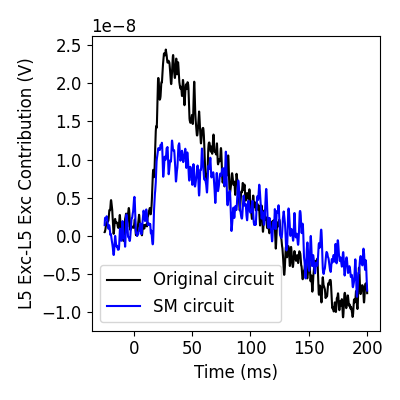

In [148]:
plt.figure(figsize=(4,4))
plt.plot(time, L5Exc[0,5]+L5Exc[1,5],'k')
plt.plot(time, L5ExcD[0,5]+L5ExcD[1,5],'b')
plt.xlabel('Time (ms)')
plt.ylabel('L5 Exc-L5 Exc Contribution (V)')
plt.legend(['Original circuit','SM circuit'])
plt.tight_layout()
plt.savefig('../../figures/L5ExcDifference.png')

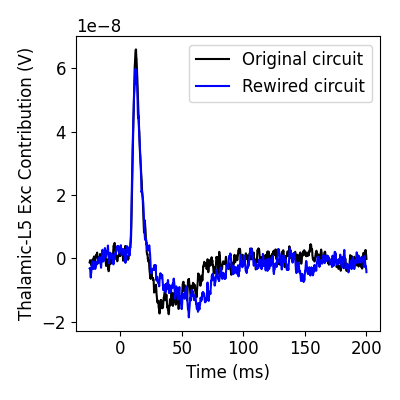

In [265]:
plt.figure(figsize=(4,4))
plt.plot(time, contrib_thal[0,5],'k')
plt.plot(time, contrib_thalR[0,5],'b')
plt.xlabel('Time (ms)')
plt.ylabel('Thalamic-L5 Exc Contribution (V)')
plt.legend(['Original circuit','Rewired circuit'])
plt.tight_layout()
plt.savefig('../../figures/Thalamaic-L5Difference.png')

In [149]:
plt.figure(figsize=(4,4))

# plt.plot(np.sum(contrib_rewired_LBC[0]/10-contrib_LBC[0]/10,axis=0))
# plt.plot(np.sum(contrib_rewired_NBC[0]/10-contrib_NBC[0]/10,axis=0))

plt.plot(time,np.sum(contrib_rewired_LBC[0:2]-contrib_LBC[0:2],axis=(0,1))+np.sum(contrib_rewired_NBC[0:2]-contrib_NBC[0:2],axis=(0,1)),'magenta')
plt.plot(time,np.sum(mean_layer_rewired[0:2],axis=(0,1))-np.sum(mean_layer_original[0:2],axis=(0,1)),'purple')

plt.legend(['Difference in PeriTC\n contribution','SM-original'],handlelength=0.5)

plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.tight_layout()
plt.savefig('../../figures/periTC.png',dpi=600)

In [152]:
plt.figure(figsize=(6,4))
layers = [2,4,5,6]
for i, layer in enumerate(layers):
    plt.subplot(2,2,i+1)

    if i == 0:
        plt.title('L2/3')
    else:
        plt.title('L'+str(layer))

    plt.plot(time,np.sum(contrib_rewired_LBC[0:2,layer,:]-contrib_LBC[0:2,layer,:]+contrib_rewired_NBC[0:2,layer,:]-contrib_NBC[0:2,layer,:],axis=0),'magenta')

    plt.plot(time,np.sum(mean_layer_rewired[0:2,layer,:]-mean_layer_original[0:2,layer,:],axis=0),'purple')

    plt.xlabel('Time (ms)')
    plt.ylabel('Signal (V)')

plt.tight_layout()
plt.savefig('../../figures/periTClayer.png',dpi=600)

In [326]:
 numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikes = sRewired.spikes.filter('L5_NBC').report
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_LBC').report),axis=0)
    
        else:
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_NBC').report),axis=0)
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_LBC').report),axis=0)

        numRewiredSims += 1


    except:
        pass


HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [180]:
bins

array([  68.575  ,   70.70635,   72.8377 , ..., 2195.6623 , 2197.79365,
       2199.925  ])

In [361]:
 numRewiredSims = 0

allRewiredSpikes = []

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
       # if i == 0:
        rewiredSpikes = sRewired.spikes.filter('Layer5Inhibitory').report
    
        if i == 0:
            spikes,bins = np.histogram(rewiredSpikes.index,bins=1000)
                
        else:
            spikes,_ = np.histogram(rewiredSpikes.index,bins=bins)
    
        allRewiredSpikes.append(spikes)
        
        # else:
        #     rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_NBC').report),axis=0)
        #     rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_LBC').report),axis=0)

        numRewiredSims += 1


    except:
        pass

allRewiredSpikes = np.array(allRewiredSpikes)

HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [328]:
 numRewiredSims = 0

allRewiredSpikes = []

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
       # if i == 0:
        rewiredSpikes = sRewired.spikes.filter('Layer5Excitatory').report
    
        if i == 0:
            spikes,bins = np.histogram(rewiredSpikes.index,bins=1000)
                
        else:
            spikes,_ = np.histogram(rewiredSpikes.index,bins=bins)
    
        allRewiredSpikes.append(spikes)
        
        # else:
        #     rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_NBC').report),axis=0)
        #     rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_LBC').report),axis=0)

        numRewiredSims += 1


    except:
        pass

allRewiredSpikes = np.array(allRewiredSpikes)

HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [362]:
allOrigSpikes = []

for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    originalSpikes = sOriginal.spikes.filter('Layer5Inhibitory').report


    spikes,_ = np.histogram(rewiredSpikes.index,bins=bins)

    allOrigSpikes.append(spikes)


allOrigSpikes = np.array(allOrigSpikes)

In [329]:
allOrigSpikes = []

for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    originalSpikes = sOriginal.spikes.filter('Layer5Excitatory').report


    spikes,_ = np.histogram(rewiredSpikes.index,bins=bins)

    allOrigSpikes.append(spikes)


allOrigSpikes = np.array(allOrigSpikes)

In [330]:
b = (bins[1:]+bins[:-1])/2

In [363]:
binIdx = np.intersect1d(np.where(b>1975),np.where(b<2200))

In [364]:
binIdx.shape

(117,)

In [365]:
pvals = scipy.stats.ttest_ind(allOrigSpikes,allRewiredSpikes).pvalue

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2640264/ipykernel_126427/2052468703.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvals = scipy.stats.ttest_ind(allOrigSpikes,allRewiredSpikes).pvalue


In [126]:
pvals2 = scipy.stats.ttest_ind(getEEGs(s1),getEEGs(s2,skip=True)).pvalue

In [127]:
pvals2

array([0.98191556, 0.93186612, 0.86826976, ..., 0.99507805, 0.99042564,
       0.99216811])

In [130]:
isSig = pvals2*2250 < 0.05

In [131]:
plt.figure()
plt.plot(np.sum(mean_layer_original[0],axis=0))
plt.plot(np.sum(mean_layer_original[0],axis=0)*isSig,'o')
plt.plot(np.sum(mean_layer_rewired[0],axis=0))

In [124]:
e = getEEGs(s1)
e2 = getEEGs(s2,skip=True)

In [125]:
plt.figure()
plt.plot(e[0])
plt.plot(e2[0])

In [75]:
e

array([array([1.0604934e-06, 1.0591283e-06, 1.0575137e-06, ..., 1.0476954e-06,
              1.0471061e-06, 1.0456250e-06], dtype=float32)                   ,
       array([1.0534171e-06, 1.0514636e-06, 1.0511571e-06, ..., 1.0657901e-06,
              1.0678555e-06, 1.0662006e-06], dtype=float32)                   ,
       array([1.0475262e-06, 1.0478285e-06, 1.0484330e-06, ..., 1.0424252e-06,
              1.0438193e-06, 1.0435233e-06], dtype=float32)                   ,
       array([1.0568929e-06, 1.0578274e-06, 1.0579458e-06, ..., 1.0604259e-06,
              1.0608677e-06, 1.0593908e-06], dtype=float32)                   ,
       array([1.0527808e-06, 1.0517647e-06, 1.0512305e-06, ..., 1.0563707e-06,
              1.0565658e-06, 1.0559227e-06], dtype=float32)                   ,
       array([1.0527093e-06, 1.0515158e-06, 1.0515487e-06, ..., 1.0576026e-06,
              1.0572313e-06, 1.0567296e-06], dtype=float32)                   ,
       array([1.0666929e-06, 1.0678851e-06, 1.

In [366]:
whereSig = np.where(pvals*100 < 0.05)

In [367]:
isSig = pvals*100 < 0.05

In [368]:
np.sum(isSig[binIdx])

19

In [196]:
plt.figure()
plt.scatter(np.arange(1000), np.ones(1000)*isSig)

In [338]:
 numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikesPC = sRewired.spikes.filter('L5_TPC:A').report
            rewiredSpikesPC = pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_TPC:B').report),axis=0)
            rewiredSpikesPC = pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_TPC:C').report),axis=0)
            rewiredSpikesPC = pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_UPC').report),axis=0)
        else:
            rewiredSpikesPC= pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_TPC:A').report),axis=0)
            rewiredSpikesPC = pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_TPC:B').report),axis=0)
            rewiredSpikesPC = pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_TPC:C').report),axis=0)
            rewiredSpikesPC = pd.concat((rewiredSpikesPC,sRewired.spikes.filter('L5_UPC').report),axis=0)

        numRewiredSims += 1

    except:
        pass

HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [31]:
 numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikes2PC = sRewired.spikes.filter('L2_TPC:A').report
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L2_TPC:B').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L2_IPC').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L3_TPC:A').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L3_TPC:C').report),axis=0)
        else:
            rewiredSpikes2PC= pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L2_TPC:A').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L2_TPC:B').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L2_IPC').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L3_TPC:A').report),axis=0)
            rewiredSpikes2PC = pd.concat((rewiredSpikes2PC,sRewired.spikes.filter('L3_TPC:C').report),axis=0)

        numRewiredSims += 1

    except:
        pass

HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [64]:
 numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikesInh5 = sRewired.spikes.filter('Layer5Inhibitory').report

        else:
            rewiredSpikesInh5 = pd.concat((rewiredSpikesInh5,sRewired.spikes.filter('Layer5Inhibitory').report),axis=0)


        numRewiredSims += 1

    except:
        pass

HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [33]:
 numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikesInh6 = sRewired.spikes.filter('Layer6Inhibitory').report

        else:
            rewiredSpikesInh6 = pd.concat((rewiredSpikesInh6,sRewired.spikes.filter('Layer6Inhibitory').report),axis=0)


        numRewiredSims += 1

    except:
        pass

HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [34]:
numRewiredSims

9

In [325]:
for i in range(9):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikes = sOriginal.spikes.filter('L5_NBC').report
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_LBC').report),axis=0)
    else:
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_NBC').report),axis=0)
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_LBC').report),axis=0)

In [324]:
for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikes = sOriginal.spikes.filter('L5_CHC').report
    else:
        originalSpikes = pd.concat((originalSpikes,sOriginal.spikes.filter('L5_CHC').report),axis=0)

numRewiredSims = 0

for i in range(10):
    
    sRewired = bp.Simulation(s2+'/'+str(i)+'/simulation_config.json')

    try:
        if i == 0:
            rewiredSpikes = sRewired.spikes.filter('L5_CHC').report
        else:
            rewiredSpikes = pd.concat((rewiredSpikes,sRewired.spikes.filter('L5_CHC').report),axis=0)

        numRewiredSims += 1

    except:
        pass



HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 0:
  #000: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #004: /opt/hdf5-static/CMake-hdf5-1.14.3/hdf5-1.14.3/src/H5VLnative_file.c line 128 in H5VL__native_file_open(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #005: /opt/hdf5-static/CMak

In [339]:
for i in range(9):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikesPC = sOriginal.spikes.filter('L5_TPC:A').report
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_TPC:B').report),axis=0)
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_TPC:C').report),axis=0)
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_UPC').report),axis=0)
    else:
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_TPC:A').report),axis=0)
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_TPC:B').report),axis=0)
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_TPC:C').report),axis=0)
        originalSpikesPC = pd.concat((originalSpikesPC,sOriginal.spikes.filter('L5_UPC').report),axis=0)


In [303]:
rewiredPcTimes = rewiredSpikes.index.values
originalPcTimes = originalSpikes.index.values

rewiredPcTimes = rewiredPcTimes[rewiredPcTimes>2030]
rewiredPcTimes = rewiredPcTimes[rewiredPcTimes<2050]

originalPcTimes = originalPcTimes[originalPcTimes>2030]
originalPcTimes = originalPcTimes[originalPcTimes<2050]

In [300]:
originalPcTimes

array([2020.22500001, 2020.77500001, 2021.02500001, ..., 2047.12500001,
       2048.57500001, 2048.85000001])

In [301]:
plt.figure()
plt.hist(originalPcTimes,alpha=0.5)
plt.hist(rewiredPcTimes,alpha=0.5)

(array([117.,  89.,  69.,  77.,  76.,  80.,  66.,  65.,  61.,  57.]),
 array([2020.00000001, 2022.99750001, 2025.99500001, 2028.99250001,
        2031.99000001, 2034.98750001, 2037.98500001, 2040.98250001,
        2043.98000001, 2046.97750001, 2049.97500001]),
 <BarContainer object of 10 artists>)

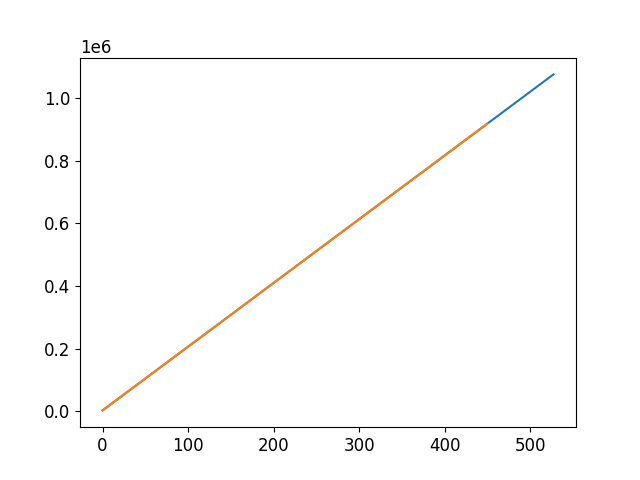

In [304]:
plt.figure()
plt.plot(np.cumsum(originalPcTimes))
plt.plot(np.cumsum(rewiredPcTimes))

In [295]:
scipy.stats.kstest(rewiredPcTimes,originalPcTimes)

KstestResult(statistic=0.06971056620889349, pvalue=4.5917789588604516e-06, statistic_location=2018.2250000052509, statistic_sign=1)

In [37]:
for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikes2PC = sOriginal.spikes.filter('L2_TPC:A').report
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L2_TPC:B').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L2_IPC').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L3_TPC:A').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L3_TPC:C').report),axis=0)
    else:
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L2_TPC:A').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L2_TPC:B').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L2_IPC').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L3_TPC:A').report),axis=0)
        originalSpikes2PC = pd.concat((originalSpikes2PC,sOriginal.spikes.filter('L3_TPC:C').report),axis=0)


In [61]:
for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikesInh5 = sOriginal.spikes.filter('Layer5Inhibitory').report
    else:
        originalSpikesInh5 = pd.concat((originalSpikesInh5,sOriginal.spikes.filter('Layer5Inhibitory').report),axis=0)


In [39]:
for i in range(10):
    
    sOriginal = bp.Simulation(s1+'/'+str(i)+'/simulation_config.json')

    

    if i == 0:
        originalSpikesInh6 = sOriginal.spikes.filter('Layer6Inhibitory').report
    else:
        originalSpikesInh6 = pd.concat((originalSpikesInh6,sOriginal.spikes.filter('Layer6Inhibitory').report),axis=0)

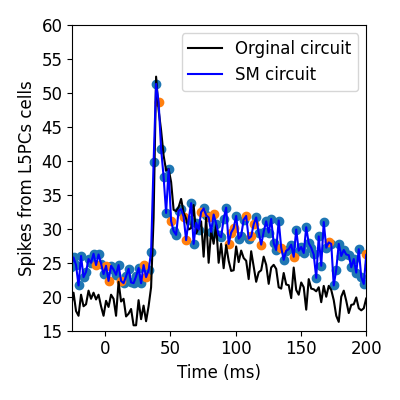

In [340]:
plt.figure(figsize=(4,4))
# bins,spikes = np.histogram(L23Spikes.index,bins=2000)
binsO,spikesO = np.histogram(originalSpikesPC.index,bins=bins)
binsD,spikesD = np.histogram(rewiredSpikesPC.index,bins=bins)

# plt.plot(spikes[1:],bins)
plt.plot(spikesO[1:]-1975,binsO/10,'k')
plt.plot(spikesD[1:]-1975,binsD/9,'b')
plt.scatter(spikesD[1:]-1975,binsD/9*~isSig)
plt.scatter(spikesD[1:]-1975,binsD/9*isSig)
# plt.plot(spikes[1:],bins/numRewiredSims)
# plt.plot(spikesO[1:],binsO/10)
plt.xlim([-25,200])
plt.ylim([15,60])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes from L5PCs cells')
plt.legend(['Orginal circuit','SM circuit'])
plt.tight_layout()
plt.savefig('../../figures/spikingPCs.png',dpi=600)

In [55]:
a = (binsO[909]-binsO[883])/10
b = (binsD[909]-binsD[883])/9
print(a/b)

2.8903846153846153


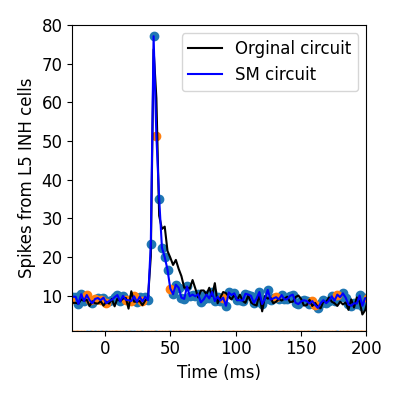

In [369]:
plt.figure(figsize=(4,4))
# bins,spikes = np.histogram(L23Spikes.index,bins=2000)
binsO,spikesO = np.histogram(originalSpikesInh5.index,bins=bins)
binsD,spikesD = np.histogram(rewiredSpikesInh5.index,bins=bins)

# plt.plot(spikes[1:],bins)
plt.plot(spikesO[1:]-1975,binsO/10,'k')
plt.plot(spikesD[1:]-1975,binsD/9,'b')
plt.scatter(spikesD[1:]-1975,binsD/9*~isSig)
plt.scatter(spikesD[1:]-1975,binsD/9*isSig)
# plt.plot(spikes[1:],bins/numRewiredSims)
# plt.plot(spikesO[1:],binsO/10)
plt.ylim([1,80])
plt.xlim([-25,200])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes from L5 INH cells')
plt.legend(['Orginal circuit','SM circuit'])
plt.tight_layout()
plt.savefig('../../figures/spikingInh5s.png',dpi=600)

In [174]:
plt.figure(figsize=(4,4))
# bins,spikes = np.histogram(L23Spikes.index,bins=2000)
binsO,spikesO = np.histogram(originalSpikesInh6.index,bins=1000)
binsD,spikesD = np.histogram(rewiredSpikesInh6.index,bins=1000)

# plt.plot(spikes[1:],bins)
plt.plot(spikesO[1:]-1975,binsO/10,'k')
plt.plot(spikesD[1:]-1975,binsD/9,'b')
# plt.plot(spikes[1:],bins/numRewiredSims)
# plt.plot(spikesO[1:],binsO/10)
plt.xlim([-25,200])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes from L6 INH cells')
plt.legend(['Orginal circuit','SM circuit'])
plt.tight_layout()
plt.savefig('../../figures/spikingInh6s.png',dpi=600)

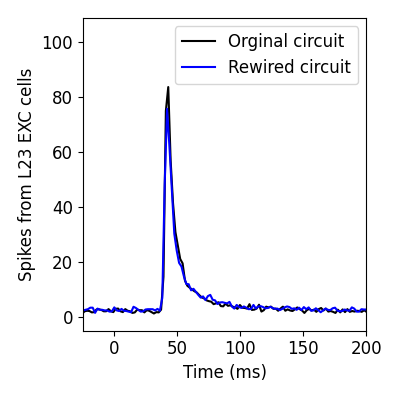

In [177]:
plt.figure(figsize=(4,4))
# bins,spikes = np.histogram(L23Spikes.index,bins=2000)
binsO,spikesO = np.histogram(originalSpikes2PC.index,bins=1000)
binsD,spikesD = np.histogram(rewiredSpikes2PC.index,bins=1000)

# plt.plot(spikes[1:],bins)
plt.plot(spikesO[1:]-1975,binsO/10,'k')
plt.plot(spikesD[1:]-1975,binsD/9,'b')
# plt.plot(spikes[1:],bins/numRewiredSims)
# plt.plot(spikesO[1:],binsO/10)
plt.xlim([-25,200])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes from L23 EXC cells')
plt.legend(['Orginal circuit','Rewired circuit'])
plt.tight_layout()
plt.savefig('../../figures/spiking2PCs.png',dpi=600)

In [327]:
plt.figure(figsize=(4,4))
# bins,spikes = np.histogram(L23Spikes.index,bins=2000)
binsO,spikesO = np.histogram(originalSpikes.index,bins=bins)
binsD,spikesD = np.histogram(rewiredSpikes.index,bins=bins)

# plt.plot(spikes[1:],bins)
plt.plot(spikesO[1:]-1975,binsO/10,'k')
plt.plot(spikesD[1:]-1975,binsD/9,'b')
plt.scatter(spikesD[1:]-1975,binsD/9*~isSig)
plt.scatter(spikesD[1:]-1975,binsD/9*isSig)
# plt.plot(spikes[1:],bins/numRewiredSims)
# plt.plot(spikesO[1:],binsO/10)
plt.xlim([-25,200])
plt.ylim([1,70])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes from PeriTC cells')
plt.legend(['Orginal circuit','SM circuit'])
plt.tight_layout()
plt.savefig('../../figures/spiking.png',dpi=600)

In [305]:
7/55

0.12727272727272726

In [159]:
for i in range(10):
    
    sDisconnected = bp.Simulation(s3+'/'+str(i)+'/simulation_config.json')

    if i == 0:
        disconnectedSpikes = sDisconnected.spikes.filter('L5_NBC').report
        disconnectedSpikes = pd.concat((disconnectedSpikes,sDisconnected.spikes.filter('L5_LBC').report),axis=0)
    else:
        disconnectedSpikes = pd.concat((disconnectedSpikes,sDisconnected.spikes.filter('L5_NBC').report),axis=0)
        disconnectedSpikes = pd.concat((disconnectedSpikes,sDisconnected.spikes.filter('L5_LBC').report),axis=0)

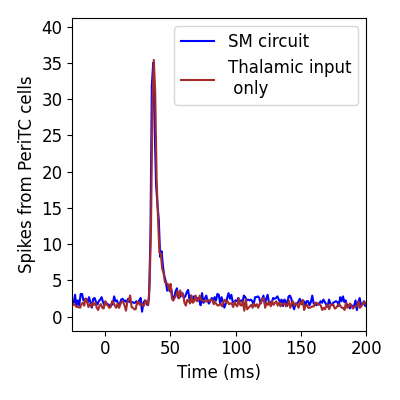

In [160]:
plt.figure(figsize=(4,4))
bins,spikes = np.histogram(rewiredSpikes.index,bins=2000)
binsO,spikesO = np.histogram(disconnectedSpikes.index,bins=2000)
plt.plot(spikes[1:]-1975,bins/9,'b')
plt.plot(spikesO[1:]-1975,binsO/10,'brown')
plt.xlim([-25,200])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes from PeriTC cells')
plt.legend(['SM circuit','Thalamic input\n only'])
plt.tight_layout()
plt.savefig('../../figures/spiking_disconnected.png',dpi=600)